### Content

[1. Introduction](#1.-Introduction)

[2. MEGMA Training & Transformation](#2.-MEGMA-Training-&-Transformation)

[3. Training the CRC detection models based on MEGMA Fmaps](#3.-Training-the-CRC-detection-models-based-on-MEGMA-Fmaps)

[4. Important microbial marker identification](#4.-Important-microbial-marker-identification)

[5. Toplogical analyisis on the important microbes](#5.-Toplogical-analyisis-on-the-important-microbes)

[6. Exploring the embedding & grouping in MEGMA](#6.-Exploring-the-embedding-&-grouping-in-MEGMA)

----


## 1. Introduction


* [1.1 MEGMA introduction](#1.1-MEGMA-introduction)
* [1.2 Metagenomic cross nation datasets and tasks](#1.2-Metagenomic-cross-nation-datasets-and-tasks)
* [1.3 MEGMA fitting and AggMapNet training strategy](#1.3-MEGMA-fitting-and-AggMapNet-training-strategy)
---


### 1.1 MEGMA introduction
**MEGMA** is short for metagenomic **M**icrobial **E**mbedding, **G**rouping, and **M**apping **A**lgorithm (MEGMA) , which is a further step development of **AggMap** [(v.1.1.7)](https://pypi.org/project/aggmap/1.1.7/) that specific for metagenomic data learning. **MEGMA** is developed to transform the tabular metagenomic data into spatially-correlated color image-like 2D-representations, named as the 2D-microbiomeprints (3D tensor data in the form of row, column and channel, or feature maps, **Fmaps**). 2D-microbiomeprints are multichannel feature maps (Fmaps) and are the inputs of ConvNet-based AggMapNet models. 

![MEGMA](https://raw.githubusercontent.com/shenwanxiang/aggmap-megma/master/cover/f2.png)

**MEGMA** is released in the **aggmap** package, in this example, we will show how to employ the **aggmap** package to perform **MEGMA** on the cross-nation datasets of metagenomics.

### 1.2 Metagenomic cross nation datasets and tasks

This metagenomic cross-nation data covers 849 gut microbial species from fecal samples of total 575 subjects (Colorectal cancers, CRCs or healthy controls, CTRs) compiled by [Wirbel et al.(Nat. Med. 25, 679-689, 2019)](https://www.nature.com/articles/s41591-019-0406-6). It contains five metagenomic datasets from five separate studies in five nations (**FRA**: France, **AUS**: Australia, **DEU**: Germany, **CHN**: China, and **USA**: America). 
             
<div align="center">
   <span style="font-weight:bold;">Table 1. Metagenomic cross-nation data.</span>
</div>



|Dataset|# Case (CRC)|# Control (CTR)|# Species|Download|
|:----|:----|:----|:----|:----|
|**AUS**|46|63|849|[label](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/AUS_dfy.csv), [data](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/AUS_dfx.csv)|
|**CHN**|74|54|849|[label](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/CHN_dfy.csv), [data](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/CHN_dfx.csv)|
|**DEU**|60|60|849|[label](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/DEU_dfy.csv), [data](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/DEU_dfx.csv)|
|**FRA**|53|61|849|[label](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/FRA_dfy.csv), [data](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/FRA_dfx.csv)|
|**USA**|52|52|849|[label](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/USA_dfy.csv), [data](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/USA_dfx.csv)|


The tasks are to build classfication models to classify CRCS from CTRs, and to identify the important microbial species that contribute to CRCs. Each microbe is a feature point in the classfication model, therefore, we need to calculate the feature importance to get the importance score of the microbes. Since we have five independent datasets that from five countries, we can build the model on one country data and test the model performance on the rest of the countries, we called this a study-to-study transfer (**STST**, model trained on one nation data and tested on the rest nations) experiment. The **STST** can tell us the real performance of the metagenomc machine learning models in the application of the external data. Therefore, in this example, the study-to-study transfer will be used for the evaluation of the performance of the metagenomic prediction models and the consistency of the across-nation biomarker discovery. Note that since **MEGMA** is an unsupervised learning method, we can use all unlabeled metagenomic data to fit `megma` (AKA, to train `megma`). Using all unlabeled data makes it more accurate and robust when calculating pairwise distances between microbes. Because the feature points in a country's metagenomic data may have very low variance, the correlation between microbes cannot be accurately calculated.

### 1.3 MEGMA fitting and AggMapNet training strategy


Because MEGMA is unsupervised learning method, therefore, in this stduy, we can use all of the metagenomic unlabelled abudance data to pre-fit MEGMA, we named this MEGMA as `megma_overall`. As shown in the figure below, the `megma_overall` can be fitted on the abundance data of the 5 countries: AUS, CHN, FRA, DEU, and USA. After that, the `megma_overall` can be used to transform the Fmaps for each country, and then we can build the AggMapNet based on the generated Fmaps of each country.


Except for that, we can also try to use unlabelled abudance data of one country only to fit the `megma`, for example if we use the USA abundance data, we can named our megma as `megma_usa`. We called this as country-specific megma, because megma is fitted on each country only. In the STST test stage, the Fmaps for the rest countries will be transformed from this megma. The country-specific `megma` maybe not as robust as the overall `megma`, because the samples to fit the country-specific megma is lower than the samples to fit the overall megma.


![MEGMA_Agm](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/MEGMA-AggMapNet.png)

## 2. MEGMA Training & Transformation

* [2.1 Fitting MEGMA on metagenomic abundance data of all countries](#2.1-Fitting-MEGMA-on-metagenomic-abundance-data-of-all-countries)
    * [2.1.1 Read and preprocess data for MEGMA](#2.1.1-Read-and-preprocess-data-for-MEGMA)
    * [2.1.2 MEGMA initialization, fitting and dump](#2.1.2-MEGMA-initialization,-fitting-and-dump)
    * [2.1.3 MEGMA loading and 2D-microbiomeprints transformation](#2.1.3-MEGMA-loading-and-2D-microbiomeprints-transformation)
    * [2.1.4 MEGMA 2D-microbiomeprints visulization](#2.1.4-MEGMA-2D-microbiomeprints-visulization)
    * [2.1.5 Well-trained MEGMA to transform the abundance data of each country](#2.1.5-Well-trained-MEGMA-to-transform-the-abundance-data-of-each-country)


* [2.2 Fitting MEGMA on metagenomic abundance data of one country only](#2.2-Fitting-MEGMA-on-metagenomic-abundance-data-of-one-country-only)
    * [2.2.1 Read and preprocess data for MEGMA](#2.2.1-Read-and-preprocess-data-for-MEGMA)
    * [2.2.2 MEGMA initialization & fitting](#2.2.2-MEGMA-initialization-&-fitting)
    * [2.2.3 MEGMA 2D-microbiomeprints transformation](#2.2.3-MEGMA-2D-microbiomeprints-transformation)
    * [2.2.4 MEGMA Fmaps visulization](#2.2.4-MEGMA-Fmaps-visulization)
    * [2.2.5 Transform the abandance data of the rest countries by country-specific MEGMA](#2.2.5-Transform-the-abandance-data-of-the-rest-countries-by-country-specific-MEGMA)
    * [2.2.6 Fitting country-specific megma for all countries](#2.2.6-Fitting-country-specific-megma-for-all-countries)


* [2.3 Discussions & conclusions on MEGMA 2D-microbiomeprints](#2.3-Discussions-&-conclusions-on-MEGMA-2D-microbiomeprints)




---


**MEGMA** is an unsupervised learning method, and it can be trained by the metagnomic abundance data only (without label information), the 2D-microbiomeprints can be transformed by the trained `megma` object from the metagnomic abundance vectors.

Therefore, we can train the `megma` based on all of the metagnomic abundance data (`megma_all`) or metagnomic abundance data of only one country (for example, `megma_usa` for USA data). Fitting the `megma` object with different data can produce different 2D-microbiomeprints. Because different data controls the arrangement and placement of feature points (i.e., the microbes), the correlation distance matrix or similar matrix of the microbes can be different when calculated by different data. 

But in general, the correlation matrix calculated based on the whole data can be more robust and accurately (Because microbe-to-microbe correlation distances/similarities are measured with more samples), and consequently, the 2D-microbiomeprints can be more structured and patterned. In this example, we will show how to generate the 2D-microbiomeprints based on the whole data or one country data, and to see the differences of 2D-microbiomeprints.

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from aggmap import AggMap, AggMapNet
from aggmap import show, loadmap

import os

if not os.path.exists('./images'):
    os.makedirs('./images')

### 2.1 Fitting MEGMA on metagenomic abundance data of all countries

Now, let's try to use all of the unlabelled metagenomic abundance data to fit **megma**, and then to transform the 2D-microbiomeprints by the pre-fitted **megma**, the **megma** trained on all data is name as `megma_all`.

We can compare the 2D-microbiomeprints generated by the **megma** that fitted by all countries metagenomic abundance data and one country metagenomic abundance data.

#### 2.1.1 Read and preprocess data for MEGMA

The metagenomic abundance data is logarithm-transformed, and to avoid the invalid logarithm transformation for zero values, a minimal value (1e-8) is added to all of the data. This operation is necessary because it can make sure that the pairwise correlation distance can be measured accurately.

In [3]:
## dataset url
url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
countries = ['CHN', 'AUS', 'DEU', 'FRA', 'USA']
minv = 1e-8 #minimal value for log-transform

## Concate data of all countries
all_dfx = []
for country in countries:
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
    all_dfx.append(dfx_vector)
dfx_all = pd.concat(all_dfx, axis=0)
dfx_all = np.log(dfx_all + minv)

print('The number of samples to pre-fit: %s, the number of feature points: %s. \n' % dfx_all.shape)

The number of samples to pre-fit: 575, the number of feature points: 849. 



In [4]:
dfx_all[dfx_all.columns[:4]].head(8)

Clostridium saccharogumia [ref_mOTU_v2_0473]  \
Sample_ID                                                  
ERR1018185                                    -18.420681   
ERR1018186                                    -18.420681   
ERR1018187                                    -18.420681   
ERR1018188                                    -18.420681   
ERR1018189                                    -18.420681   
ERR1018190                                    -18.420681   
ERR1018191                                    -18.420681   
ERR1018192                                    -18.420681   

            Clostridium innocuum [ref_mOTU_v2_0643]  \
Sample_ID                                             
ERR1018185                                -9.271705   
ERR1018186                                -8.889649   
ERR1018187                                -9.300529   
ERR1018188                                -8.072227   
ERR1018189                               -18.420681   
ERR1018190                                -8.601296   
ERR1018191                                -9.211839   
ERR1018192                                -5.575946   

            Clostridium sp. KLE 1755 [ref_mOTU_v2_0860]  \
Sample_ID                                                 
ERR1018185                                    -9.271705   
ERR1018186                                    -7.097950   
ERR1018187                                    -8.607436   
ERR1018188                                    -9.170776   
ERR1018189                                   -18.420681   
ERR1018190                                    -7.502720   
ERR1018191                                   -18.420681   
ERR1018192                                    -8.943168   

            Clostridium scindens [ref_mOTU_v2_0883]  
Sample_ID                                            
ERR1018185                                -8.578611  
ERR1018186                                -8.196538  
ERR1018187                                -8.607436  
ERR1018188                                -8.072227  
ERR1018189                               -18.420681  
ERR1018190                                -8.601296  
ERR1018191                                -5.383296  
ERR1018192                               -18.420681

#### 2.1.2 MEGMA initialization, fitting and dump

In the initialization stage, **MEGMA** supports a varity of metric to measure the distances between the microbes. The default `metric` is the correlation distance. Importantly, **MEGMA** also supports to input a pre-difined distance matrix ( the `info_distance` parameter) for of microbes. 


In the fitting stage, **MEGMA** default uses the UMAP (the `emb_method` parameter) method to perform the embedding of the microbes, the parameter `cluster_channels` is for the grouping of the microbes, it uses the hierarchical clustering algrothm to generate the subgroups of the microbes. Importantly, **MEGMA** also supports to input a pre-difined (or customized) microbial subgroup list (i.e., the `feature_group_list` parameter, it can be used to customize the group of the microbes). More information about **Embedding & Grouping** can be see **[here](https://bidd-aggmap.readthedocs.io/en/master/_example_MEGMA/example_05_embedding_grouping.html)**. 

The important hyperparameters for microbial embedding are `var_thr`, `random_state`, `n_neighbors`, `n_epochs`. These parameters can control how `megma` to arrange the microbes in the 2D. `var_thr` may affect the model performance most. The parameter `var_thr` can be used to filter out some microbes in very low variances, under the low sample size case (the unlabeled data to fit MEGMA), the variances of same feature points can be very low. **Please be noted** that the parameter `var_thr` is a feature selection parameter and is quite important for low-sample size cases. In practical, `var_thr` can be optimized by the performance the model. In general, higher `var_thr` value can help to generate a more structured feature maps, and therefore the model performance can be improved. If the variance of the feature points is very low, the resulting feature maps will be more randomly arranged. This is because the correlation distances between feature points with low variance cannot be measured very accurately. Consequently, the Fmap looks like a random arrangement. However, the threshold `var_thr` that is too high will lead to a decrease in the number of retained features, which may also lead to the deterioration of model performance. Therefore, we recommended that the `var_thr` is a hyperparameters and shold be optimized by the performance the model. the `var_thr` should be at least greater than 0. More information on the hyperparameters is avaliable **[here](https://bidd-aggmap.readthedocs.io/en/latest/_HPs/hps_content.html#The-important-hyperparameters-in-AggMap-feature-restructuring)**. 

The object **megma**  can be dumped in your disk and then loaded next time by `loadmap`. Basically, the **megma** object is same as a trained model, once it is fitted by the unlabelled data, it can be used to transform an 1D vector into 3D tensor, i.e., the multichannel Fmaps.


In [5]:
## parameters in MEGMA
metric = 'correlation' #distance metric
emb_method = 'umap' #embedding method
cluster_channels = 5 #channel number

## Fitting on all of the data
megma_all = AggMap(dfx_all, metric = metric, by_scipy = True,)
megma_all = megma_all.fit(emb_method = emb_method, 
                          cluster_channels = cluster_channels,  
                          feature_group_list = [],
                          var_thr = 0,
                          verbose = 0)
## save megma
megma_all.save('./megma/megma.all')

#delete megma from memory
del megma_all 

2022-08-23 12:27:14,465 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5370.94it/s]

2022-08-23 12:27:14,694 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:27:17,007 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:27:18,007 - INFO - [bidd-aggmap] - Finished


#### 2.1.3 MEGMA loading and 2D-microbiomeprints transformation
Now, we have deleted the `megma_all` in our memory, but we can reload it by `loadmap`.

Once we have fitted our megma, we are able to use it to transform the abundance vectors. In the transformation stage, metagenomic abundance vector data can be scaled by `scale_method`. The `standard` method is for the *z*-score standard scaling, and the `megma_all.batch_transform` method can transform a set of 1D vectors to 3D tensors (-1, w, h, c), while the `megma_all.transform` method is to transform one 1D vector to one 3D tensor (1, w, h, c). 

In [6]:
#reload megma from disk
megma_all = loadmap('./megma/megma.all')
scale_method = 'standard'#scale method

country = 'USA' # transform the 2D-microbiomeprints for one country
dfx_vector = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
dfx_vector = np.log(dfx_vector + minv)
X_tensor = megma_all.batch_transform(dfx_vector.values, scale_method = scale_method)
X_tensor.shape

100%|#################################################################################| 104/104 [00:01<00:00, 60.50it/s]


(104, 30, 29, 5)

In [7]:
dfy = pd.read_csv(url + '%s_dfy.csv' % country, index_col='Sample_ID')
idx = dfy.reset_index().groupby(['Country', 'Group']).apply(lambda x:x.index.tolist())
idx

Country  Group
USA      CRC      [2, 3, 4, 5, 6, 9, 12, 14, 16, 19, 28, 29, 30,...
         CTR      [0, 1, 7, 8, 10, 11, 13, 15, 17, 18, 20, 21, 2...
dtype: object

#### 2.1.4 MEGMA 2D-microbiomeprints visulization

The trained `megma` object has attributes of `plot_grid`, `plot_scatter`, `plot_tree` for data visulization. The `plot_grid` is to plot a regular grid, and in this grid, each microbe has an optimized postion, its neighbors are abundance-correlated microbes. The `plot_scatter` is to plot the 2D embedding results of the microbes, the `plot_tree` is to plot the clustering tree of the microbes.

In [8]:
megma_all.plot_grid(htmlpath='./images', htmlname = 'megma_all')

2022-08-23 12:27:19,979 - INFO - [bidd-aggmap] - generate file: ./images/megma_all_feature points_849_correlation_umap_mp
2022-08-23 12:27:19,987 - INFO - [bidd-aggmap] - save html file to ./images/megma_all_feature points_849_correlation_umap_mp


In [9]:
fig = megma_all.plot_tree(add_leaf_labels=False, leaf_font_size = 1)

----
#### 2.1.5 Well-trained MEGMA to transform the abundance data of each country

Next, let's to show the transformed feature maps (aka the 2D-microbiomeprints or 3D tensor). the well-trained `megma_all` object is able to transform the data of the rest of countries.

In [10]:
def plot(X, megma, rows, fname = './Country1_fmp.png'):
    n = 5
    fontsize = 40
    fig, axes = plt.subplots(nrows=2, ncols=n, figsize=(22,9), sharex = True, sharey = True)
    row_names = [', '.join(i) for i in rows]
    for row, row_ax in zip(rows, axes):
        pidx = idx.loc[row][:n]        
        for pid, ax in zip(pidx, row_ax):
            cid = row[0]
            pid_name = '%s-%s' % (cid, pid)
            x = X[pid]
            color_list = pd.Series(megma.colormaps).sort_index().iloc[1:].tolist()
            color_list.append('#000000')
            show.imshow(x, ax = ax,  mode = 'dark', color_list= color_list, x_max=3, vmin=-0.5, vmax=0.9)
            ax.set_title(pid_name, fontsize = fontsize) 
    for ax, row in zip(axes[:,0], row_names):
        ax.set_ylabel(row.split(',')[1], fontsize = fontsize)  

    fig.tight_layout()
    fig.savefig(fname, bbox_inches='tight', dpi=400) 

100%|###############################################################################| 128/128 [00:00<00:00, 2379.22it/s]


Trained MEGMA has transformed 3D tensor for CHN data


100%|###############################################################################| 109/109 [00:00<00:00, 2282.86it/s]


Trained MEGMA has transformed 3D tensor for AUS data


100%|###############################################################################| 120/120 [00:00<00:00, 2224.45it/s]


Trained MEGMA has transformed 3D tensor for DEU data


100%|###############################################################################| 114/114 [00:00<00:00, 2433.32it/s]


Trained MEGMA has transformed 3D tensor for FRA data


100%|###############################################################################| 104/104 [00:00<00:00, 2187.51it/s]


Trained MEGMA has transformed 3D tensor for USA data


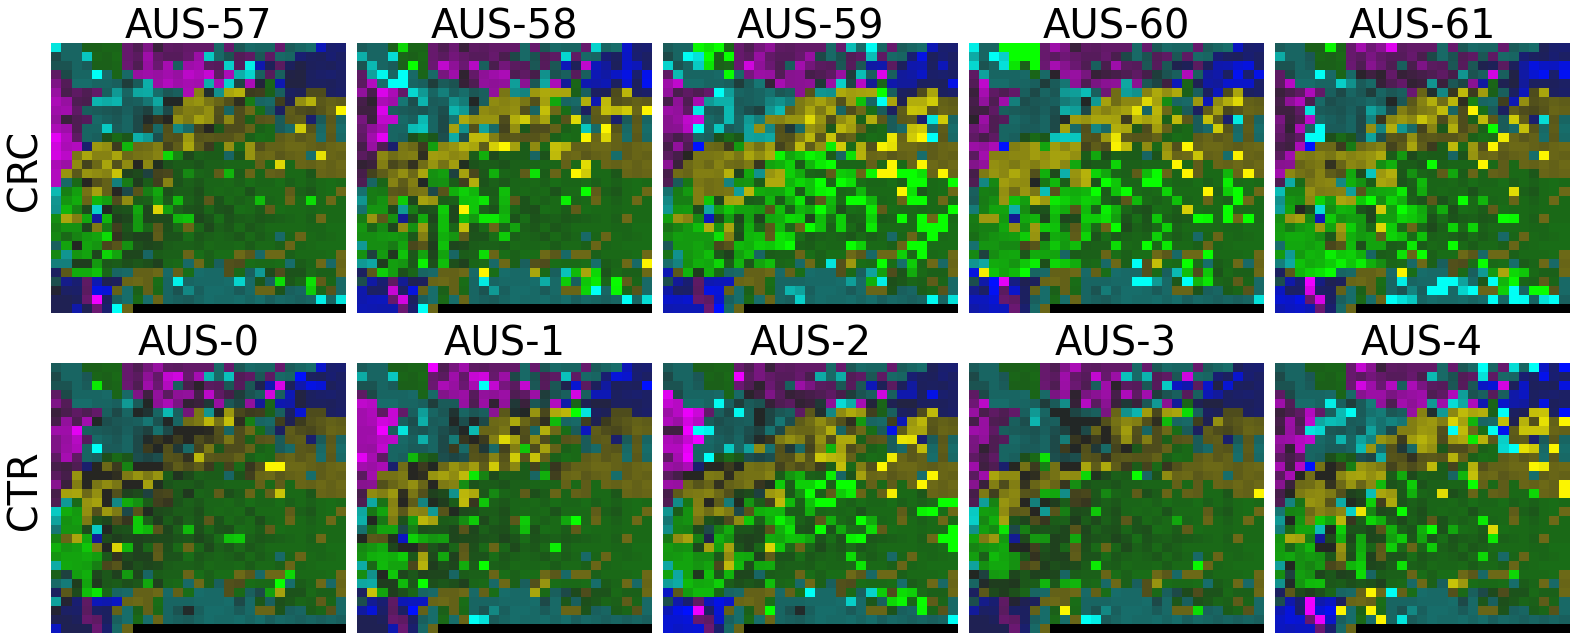

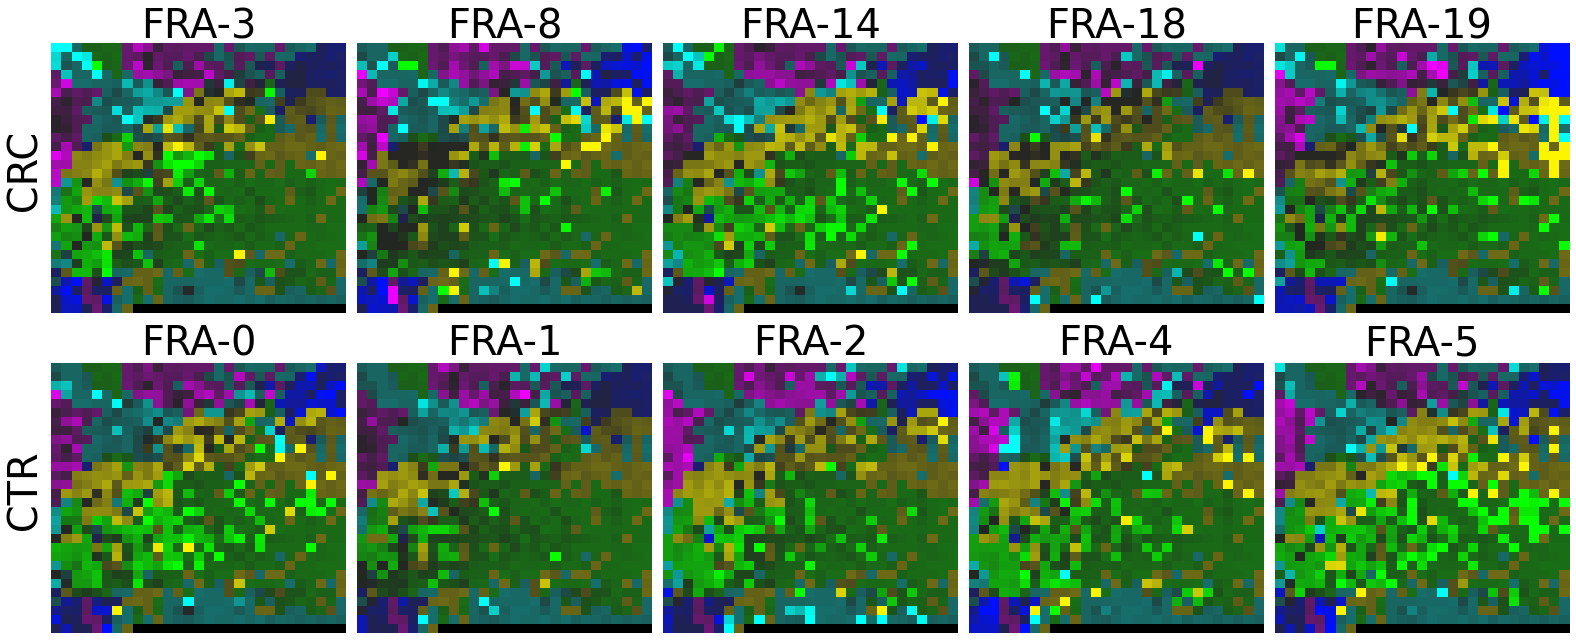

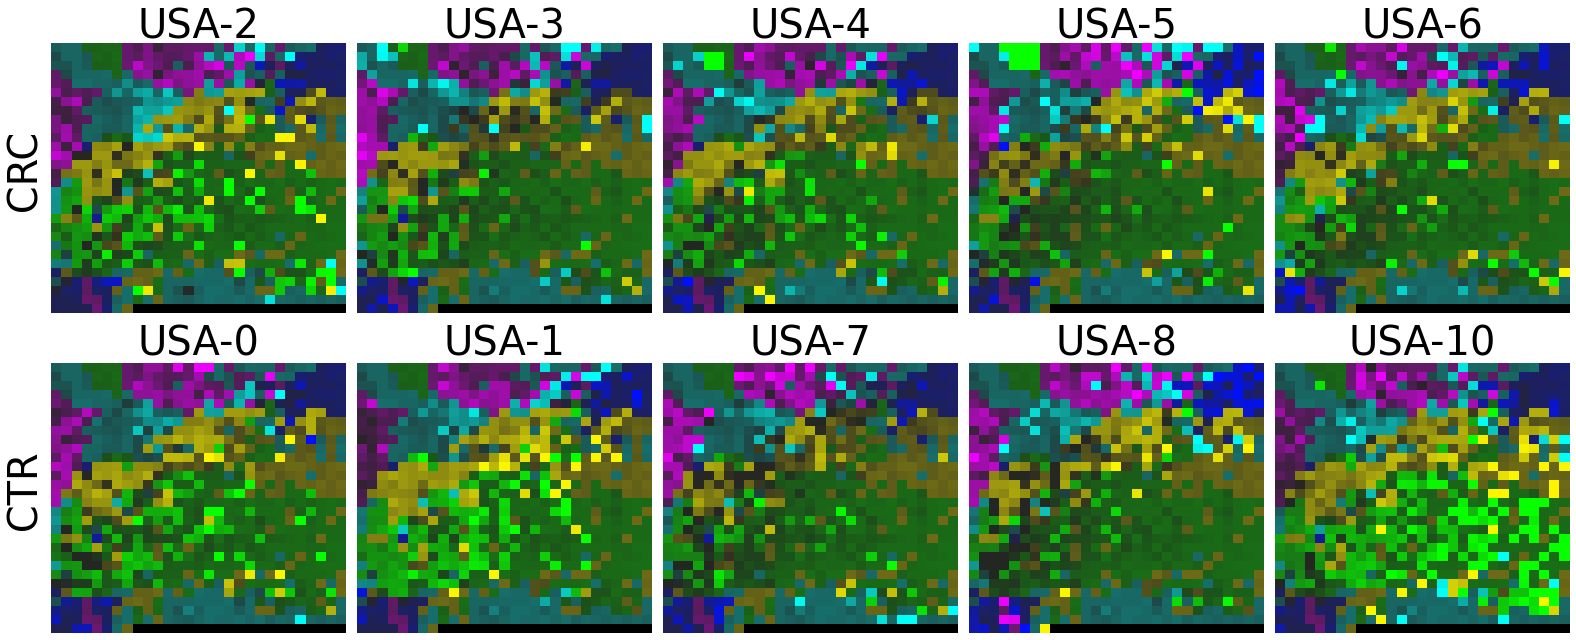

In [11]:
for country in countries:
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
    dfx_vector = np.log(dfx_vector + minv)
    X_tensor = megma_all.batch_transform(dfx_vector.values, scale_method = scale_method)
    print('Trained MEGMA has transformed 3D tensor for %s data' % country)
    
    dfy = pd.read_csv(url + '%s_dfy.csv' % country, index_col='Sample_ID')
    idx = dfy.reset_index().groupby(['Country', 'Group']).apply(lambda x:x.index.tolist())
    rows = idx.index.tolist()
    rows = rows[:2]
    
    plot(X_tensor, megma_all, rows, fname = './images/fmp_megma_all_%s.png' % country)

----

### 2.2 Fitting MEGMA on metagenomic abundance data of one country only

In this section, we will fit the `megma` object on etagenomic abundance data of one country only (such as the USA data, we will name the fitted megma object as `megma_usa` in this example), later we can transform the data from the rest of the country by the trained country-specific MEGMA. 

#### 2.2.1 Read and preprocess data for MEGMA

We use the same data preprocessing method as above, and read one country metagenomic abundance data for fitting of MEGMA

In [12]:
## dataset
country = 'USA' # 'USA', 'FRA', 'AUS', 'DEU', 'CHN'
url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
dfx = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
dfy = pd.read_csv(url + '%s_dfy.csv' % country, index_col='Sample_ID')
dfx = np.log(dfx + minv)

#### 2.2.2 MEGMA initialization & fitting

As we have discussed above, the parameter var_thr is a feature selection parameter and is quite important for low-sample size cases. Since we only use one country's metagenomic abundance data to fit `megma`, the var_thr should be adjusted so that we can remove those microbes that are in a quite low variance.

If the variance of a feature point (aka, a microbe) is very low, the resulting feature maps will be more randomly arranged. This is because the correlation distances between feature points with low variance cannot be measured very accurately. Consequently, the Fmap looks like a random arrangement. However, the threshold `var_thr` that is too high will lead to a decrease in the number of retained features, which may also lead to the deterioration of model performance. Therefore, we recommended that the `var_thr` is a hyperparameters and shold be optimized by the performance the model.



In [13]:
megma_usa = AggMap(dfx, by_scipy=True, info_distance = None)
megma_usa = megma_usa.fit(var_thr = 3., 
                          #can be optimized by each megma based on their model performance, such as 1, 2, 4, 8, 10, ..
                          verbose = 0)

2022-08-23 12:27:38,485 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5552.14it/s]

2022-08-23 12:27:38,655 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:27:39,203 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:27:39,420 - INFO - [bidd-aggmap] - Finished


#### 2.2.3 MEGMA 2D-microbiomeprints transformation

In [14]:
X = megma_usa.batch_transform(dfx.values, scale_method = scale_method)
X.shape

100%|###############################################################################| 104/104 [00:00<00:00, 2291.07it/s]


(104, 28, 27, 5)

#### 2.2.4 MEGMA Fmaps visulization

In [15]:
megma_usa.plot_grid(htmlpath='./images', htmlname = 'megma_%s' % country)

2022-08-23 12:27:39,545 - INFO - [bidd-aggmap] - generate file: ./images/megma_USA_feature points_752_correlation_umap_mp
2022-08-23 12:27:39,551 - INFO - [bidd-aggmap] - save html file to ./images/megma_USA_feature points_752_correlation_umap_mp


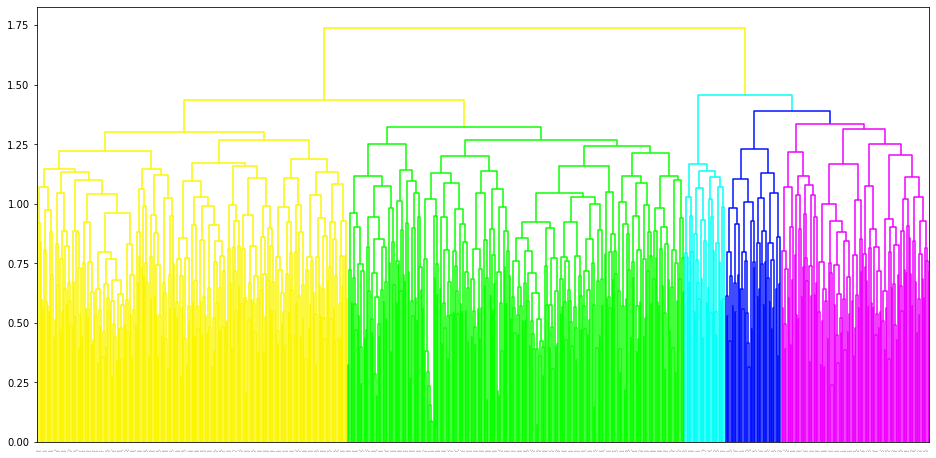

In [16]:
fig = megma_usa.plot_tree(add_leaf_labels = False, leaf_font_size = 1)

In [17]:
idx = dfy.reset_index().groupby(['Country', 'Group']).apply(lambda x:x.index.tolist())
idx

Country  Group
USA      CRC      [2, 3, 4, 5, 6, 9, 12, 14, 16, 19, 28, 29, 30,...
         CTR      [0, 1, 7, 8, 10, 11, 13, 15, 17, 18, 20, 21, 2...
dtype: object

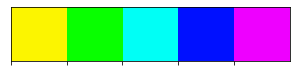

In [18]:
sns.palplot(megma_usa.group_color_dict.values())

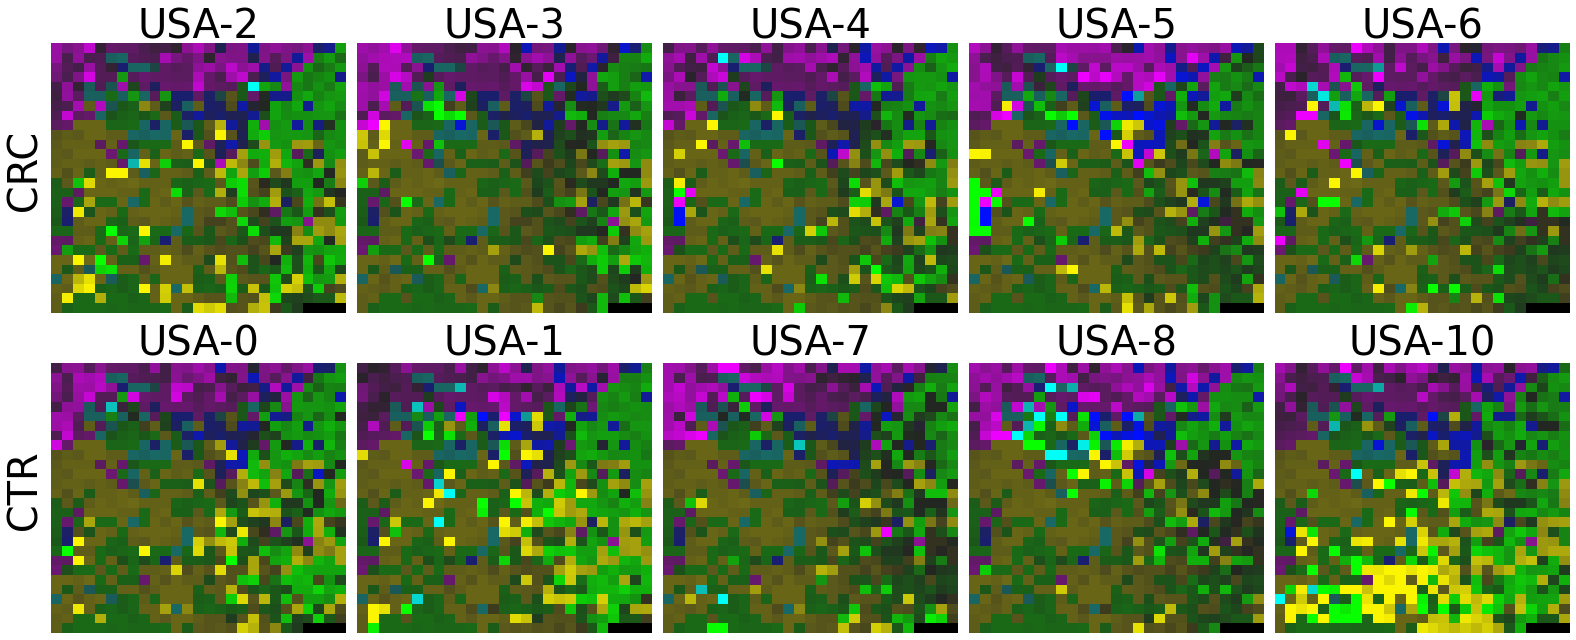

In [19]:
rows = idx.index.tolist()
rows = rows[:2]
plot(X, megma_usa, rows, fname = './images/fmp_megma_usa_%s.png' % country)

#### 2.2.5 Transform the abandance data of the rest countries by country-specific MEGMA

We have trained the MEGMA based on one country data, of course it now can transform the metagenomic vector data of this country, but it can also be used to transform the metagenomic vector data of the rest of the countries.

100%|###############################################################################| 128/128 [00:00<00:00, 1524.35it/s]


Trained MEGMA has transformed 3D tensor for CHN data


100%|###############################################################################| 109/109 [00:00<00:00, 2484.37it/s]


Trained MEGMA has transformed 3D tensor for AUS data


100%|###############################################################################| 120/120 [00:00<00:00, 2370.25it/s]


Trained MEGMA has transformed 3D tensor for DEU data


100%|###############################################################################| 114/114 [00:00<00:00, 2600.77it/s]


Trained MEGMA has transformed 3D tensor for FRA data


100%|###############################################################################| 104/104 [00:00<00:00, 2368.87it/s]


Trained MEGMA has transformed 3D tensor for USA data


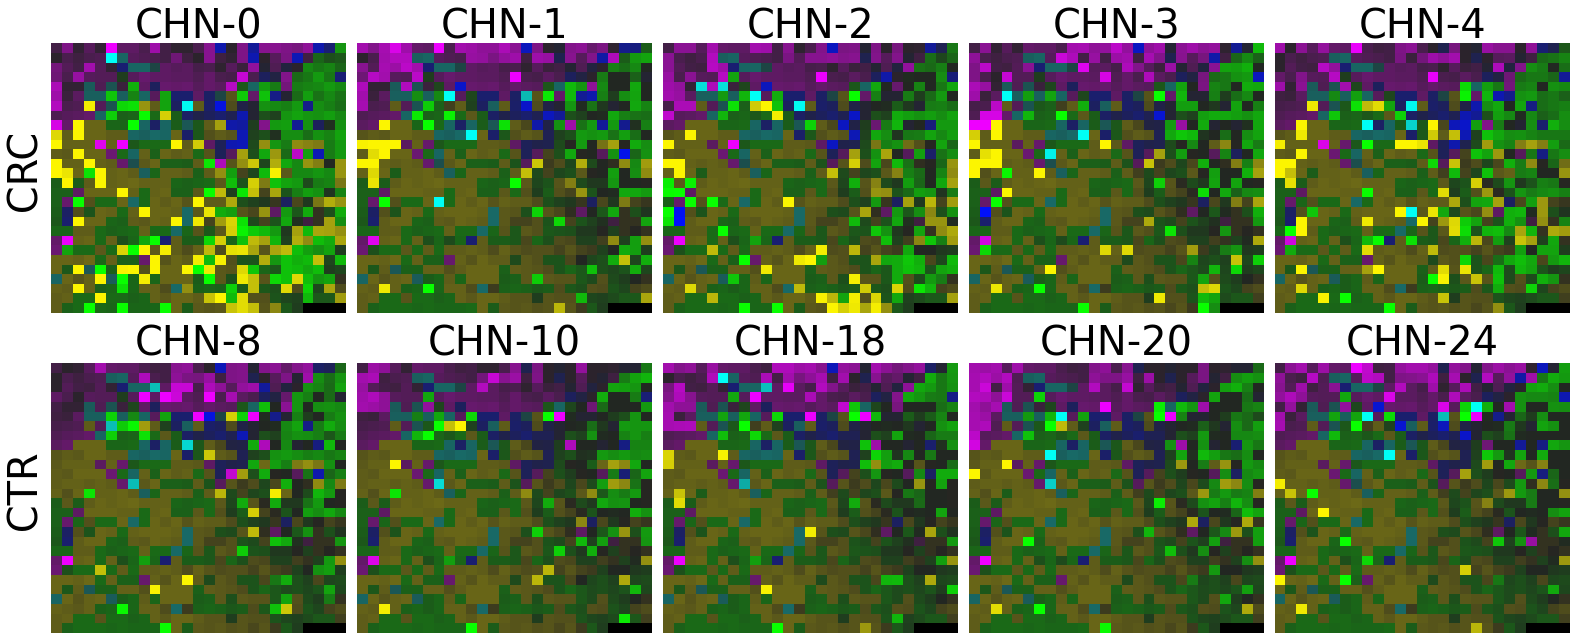

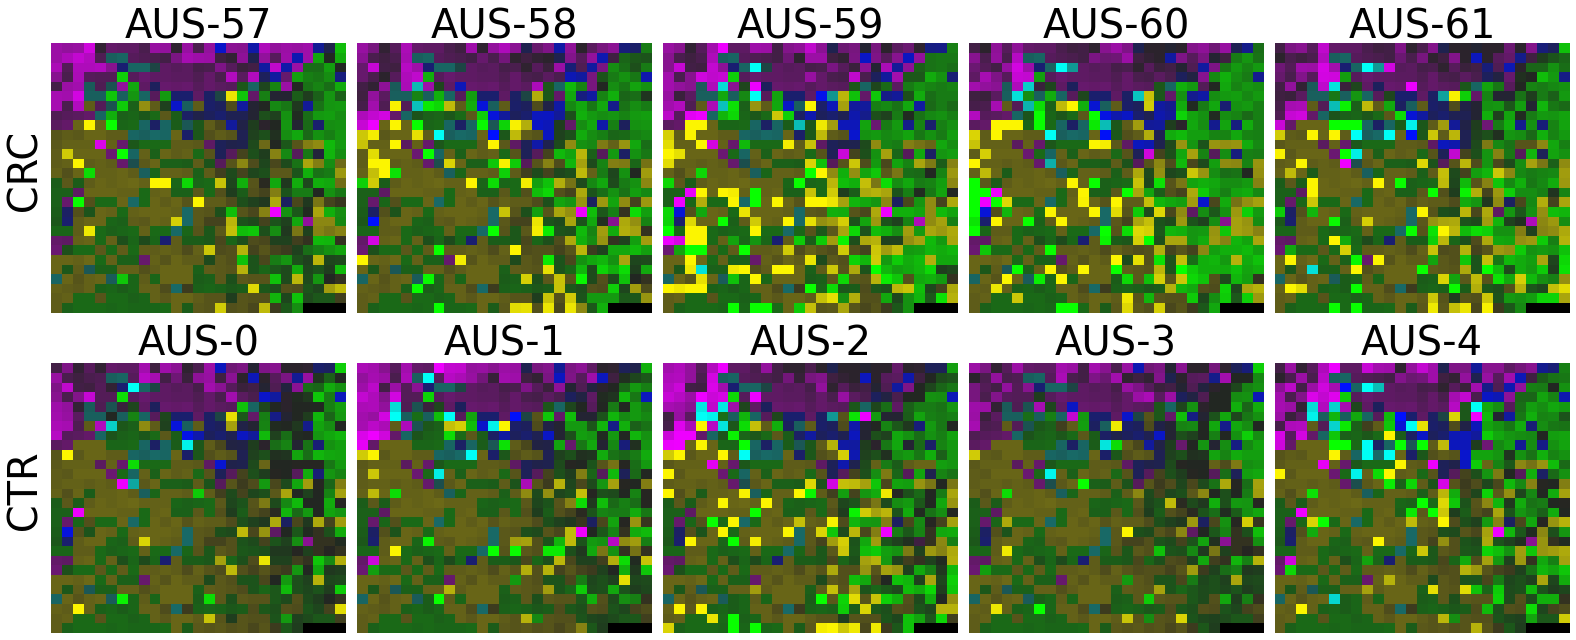

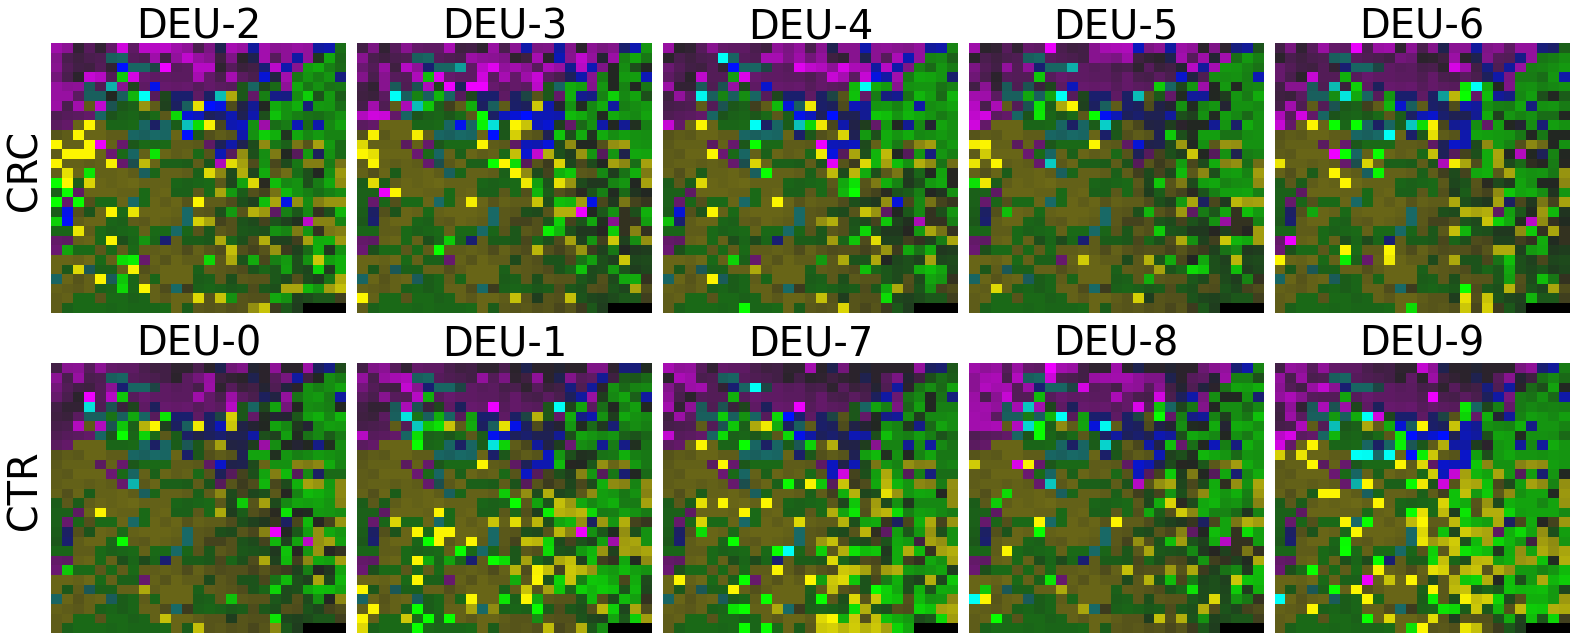

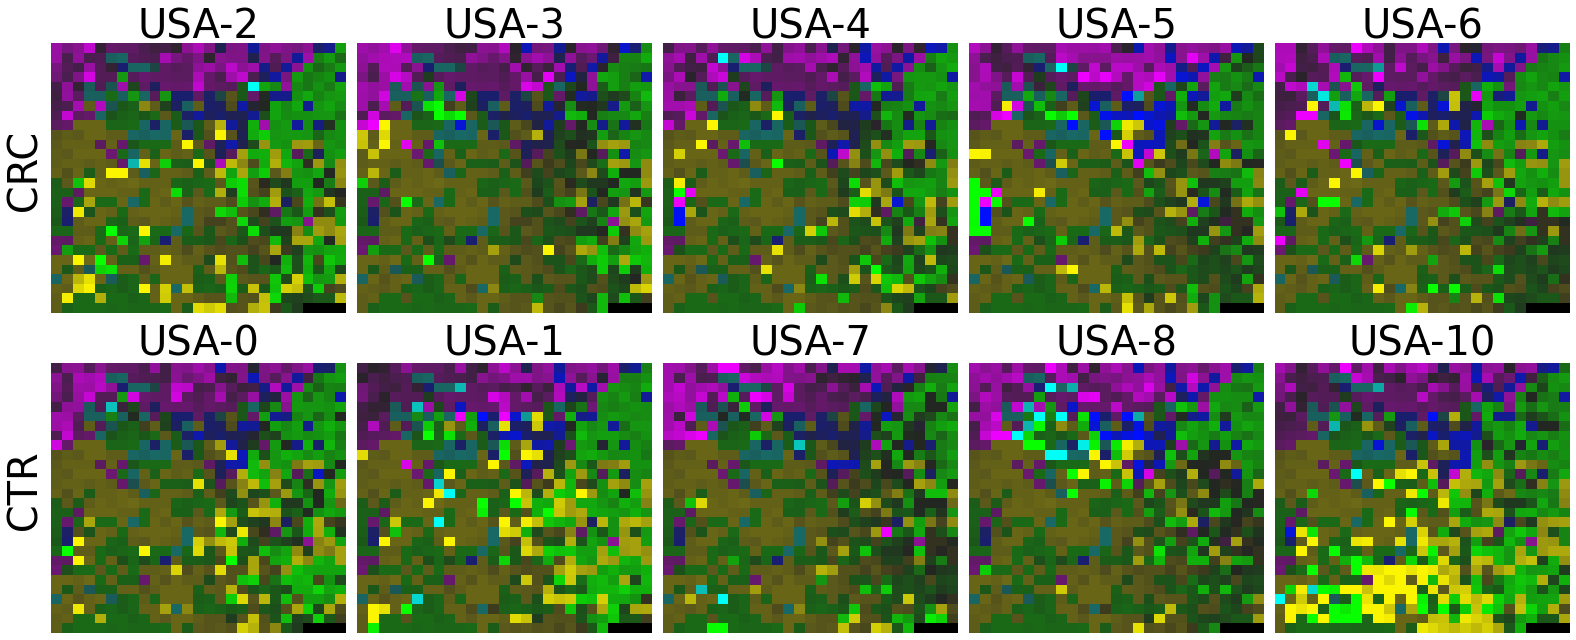

In [20]:
for country in countries:
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
    dfx_vector = np.log(dfx_vector + minv)
    X_tensor = megma_usa.batch_transform(dfx_vector.values, scale_method = scale_method)
    print('Trained MEGMA has transformed 3D tensor for %s data' % country)
    dfy = pd.read_csv(url + '%s_dfy.csv' % country, index_col='Sample_ID')
    idx = dfy.reset_index().groupby(['Country', 'Group']).apply(lambda x:x.index.tolist())
    rows = idx.index.tolist()
    rows = rows[:2]
    plot(X_tensor, megma_usa, rows, fname = './images/fmp_megma_usa_%s.png' % country)

#### 2.2.6 Fitting country-specific megma for all countries

In [21]:
megmas = []
for country in countries:
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % country, index_col='Sample_ID')
    dfx_vector = np.log(dfx_vector + minv)
    megma = AggMap(dfx_vector,  by_scipy=True)
    megma = megma.fit(#can be optimized by each megma based on their model performance, such as 1, 2, 4, 8, 10, ..
                      var_thr = 3.,  
                      verbose = 0)
    print(country, megma.fmap_shape)
    megma.save('./megma/megma.%s' % country)
    megmas.append(megma)
    
    ##### plot the Fmaps
    # X = megma.batch_transform(dfx_vector.values, scale_method = scale_method)
    # dfy = pd.read_csv(url + '%s_dfy.csv' % country, index_col='Sample_ID')
    # idx = dfy.reset_index().groupby(['Country', 'Group']).apply(lambda x:x.index.tolist())
    # rows = idx.index.tolist()
    # rows = rows[:2]
    # plot(X, megma, rows, fname = './images/fmp_megma_%s_%s.png' % (country, country))

2022-08-23 12:28:00,153 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5608.91it/s]

2022-08-23 12:28:00,322 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:28:00,773 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:28:01,090 - INFO - [bidd-aggmap] - Finished
CHN (26, 25)
2022-08-23 12:28:01,232 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5700.32it/s]

2022-08-23 12:28:01,396 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:28:01,915 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:28:02,245 - INFO - [bidd-aggmap] - Finished
AUS (28, 27)
2022-08-23 12:28:02,393 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5653.09it/s]

2022-08-23 12:28:02,559 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:28:03,088 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:28:03,395 - INFO - [bidd-aggmap] - Finished
DEU (28, 27)
2022-08-23 12:28:03,543 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5692.89it/s]

2022-08-23 12:28:03,707 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:28:04,259 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:28:04,840 - INFO - [bidd-aggmap] - Finished
FRA (28, 28)
2022-08-23 12:28:05,275 - INFO - [bidd-aggmap] - Calculating distance ...


100%|###############################################################################| 849/849 [00:00<00:00, 5661.03it/s]

2022-08-23 12:28:05,439 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...


2022-08-23 12:28:05,977 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-23 12:28:06,198 - INFO - [bidd-aggmap] - Finished
USA (28, 27)


### 2.3 Discussions & conclusions on MEGMA 2D-microbiomeprints
Now, let's use our naked eyes (label the important zone manually) to find the distinct area between the CRCs and CTRs in the generated **2D-microbiomeprints** by the `megma_all` and `megma_usa` objects, respectively. 

We can indentify the important zone of `megma_all` generated **2D-microbiomeprints** easily, it is located in the top left corner of the feature maps  (**Fig.1**, red boxes). However, the important zone for `megma_usa` generated **2D-microbiomeprints** is different, which is located in a different region of the feature maps (**Fig.2**, red boxes). This is because when different datasets are used to fit `megma` object, the final arrangement of microbes is different due to the inconsistent correlation distance between microbes determined by the datasets. Nonetheless, important microbes always cluster together to form hotspots. 

Furthermore, the microbes in the red-box zone of `megma_usa` Fmaps are same as the microbes in the red-box zone of `megma_all` Fmaps (You can find out the microbial names in grid plots of `megma_usa` and `megma_all`). In subsequent analyses, we will identify these important microbes based on interpretable deep learning methods, to find out whether the microbes in different hot zones generated by the two methods are consistent or not.


Except for that, we can draw anther important conlusion, that is, the feature maps generated by `megma_usa` for **USA** data is much more ordered and structured than the data in the rest of the countries, this is because the `megma_usa` is only trained on the **USA** data. On the feature maps generated by `megma_all`, we can see that the feature maps of all countries are quite ordered and structured. Therefore, in practical usage, we'd like to recommend to fit on larger samples, because the intrinsic relationship between feature points can be better exposed by higher-sample data. Unsupervised `megma` operates in separate fitting and transformation stages for enabling transfer learning. The fitting operation can be trained on higher-sample unlabeled data and subsequently used for transforming low-sample unlabeled data. `megma` can also be dumped into local disk and reloaded next time for re-fitting or transformation.



![tr_ts1](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/tr_All_ts_All.png)

**Fig.1** the `megma_all` generated **2D-microbiomeprints** for the five countries, the important zone identified by naked eye  (distinct zone of CRCs from healthy controls) is highlight by the red box.


![tr_ts2](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/tr_USA_ts_All.png)

**Fig.2** the `megma_usa` generated **2D-microbiomeprints** for the five countries, the important zone identified by naked eye  (distinct zone of CRCs from healthy controls) is highlight by the red box.

## 3. Training the CRC detection models based on MEGMA Fmaps 

Now that we have fitted the `megma` object for the Fmaps generation, we can train the CRC detection models based on these transformed Fmaps. We are going to use the convolutional neural network (CNN) based AggMapNet to train the Fmaps. AggMapNet is a simple yet efficient network architecture for low-sample size data, it has fewer trainable parameters and early-stopping strategy to stop from overfitting.

[3.1 Training & test AggMapNet on overall MEGMA Fmaps](#3.1-Training-and-test-AggMapNet-on-overall-MEGMA-Fmaps)

[3.2 Training and test AggMapNet on country specific MEGMA Fmaps](#3.2-Training-and-test-AggMapNet-on-country-specific-MEGMA-Fmaps)

[3.3 Comparing the STST performance and discussion](#3.3-Comparing-the-STST-performance-and-discussion)

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc as calculate_auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

from aggmap import AggMap, AggMapNet
from aggmap import show, loadmap

np.random.seed(666) #just for reaptable results

In [9]:
## AggMapNet parameters
epochs = 30 #number of epochs
lr = 1e-4 #learning rate
batch_size = 1 #batch size
conv1_kernel_size = 7 #kernal size of the first cnn layer
gpuid = 1 #use which gpu to train the model



def train(megma, train_country,  model_save_dir):
    
    ## data process parameters
    minv = 1e-8 #minimal value for log-transform
    scale_method = 'standard' #data scaling method
    url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
    
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % train_country, index_col='Sample_ID')
    dfx_vector = np.log(dfx_vector + minv)
    dfy = pd.read_csv(url + '%s_dfy.csv' % train_country, index_col='Sample_ID')

    X = megma.batch_transform(dfx_vector.values, 
                              scale_method = scale_method)
    Y = pd.get_dummies(dfy.Group).values
    
    # fit AggMapNet
    clf = AggMapNet.MultiClassEstimator(epochs = epochs,  
                                        batch_size = batch_size, 
                                        lr = lr, 
                                        conv1_kernel_size = conv1_kernel_size,
                                        gpuid = gpuid,
                                        verbose = 0)
    clf.fit(X, Y)
    
    
    ## save supervised AggMapNet model
    model_save_name = os.path.join(model_save_dir, 'aggmapnet.%s' % train_country)
    clf.save_model(model_save_name)

    return clf


def test(clf, megma, test_country):
    
    ## data process parameters
    minv = 1e-8 #minimal value for log-transform
    scale_method = 'standard' #data scaling method
    url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
    
    dfx_vector = pd.read_csv(url + '%s_dfx.csv' % test_country, index_col='Sample_ID')
    dfx_vector = np.log(dfx_vector + minv)
    dfy = pd.read_csv(url + '%s_dfy.csv' % test_country, index_col='Sample_ID')
    testX = megma.batch_transform(dfx_vector.values, 
                                  scale_method = scale_method)
    testY = pd.get_dummies(dfy.Group).values 
    y_true = testY[:,0]
    y_pred = clf.predict(testX)[:,0] 
    y_score = clf.predict_proba(testX)[:,0]

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp + tn) / sum([tn, fp, fn, tp])
    sensitivity = tp / sum([tp, fn])
    specificity = tn / sum([tn, fp])
    roc_auc = roc_auc_score(y_true, y_score)
    precision = tp / sum([tp, fp])
    recall =  tp / sum([tp, fn]) #equals to sensitivity
    
    res = {'test_country':test_country,
           'accuracy':acc, 
           'roc_auc':roc_auc,
           'sensitivity': sensitivity, 
           'specificity': specificity,
           'precision':precision,
           'recall':recall}
    return res

def get_non_diag_mean(df):
    v = df.values.copy()
    np.fill_diagonal(v, np.nan)
    mean =  pd.DataFrame(v, columns = df.columns, index = df.index).mean(axis=1).round(2)
    std = pd.DataFrame(v, columns = df.columns, index = df.index).std(axis=1).round(2)
    return mean,std

### 3.1 Training and test AggMapNet on overall MEGMA Fmaps

In this section, we will introduce how to employ the CNN-based AggMapNet to train CRC detection models based on the `megma_all` generated **2D-microbiomeprints (Fmaps)**. The CRC dection model is a classfication model because we have the binary labels (CRCs or CTRs) in our data. Same as the Fmaps generation, we can use the study to stduy transfer(STST) method to test the performance of our model.

Please be Noted that in the STST experiment, the Fmaps can be transformed by a country-specific `megma` (fitted or trained by one country unlabelled metagenomic data, such as `megma_usa`) or an overall `megma` (fitted or trained by all unlabelled metagenomic data, i.e., the `megma_all`), becuase **MEGMA** is an unsupervised learning method and only needs to be fitted on the unlabelled data.

First of all, let's try to explore the STST model performance on the Fmaps transformed by an overall `megma_all` . Specifically, we are going to train the CRC classficaition model `AggMapNet` (supervised model) based the Fmaps that generated by `megma_all` (unsupervised model). We will train the CRC detection model based on one country data and test the model performance on the rest of the countries.

In [10]:
save_dir = './megma_overall_model'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# load the pre-fitted megma_all object
megma = loadmap('./megma/megma.all')

countries = ['USA', 'CHN', 'DEU', 'FRA', 'AUS', ] 
all_res1 = []
for train_country in countries:
    clf = train(megma, train_country, save_dir,)
    # Test model performance using STST strategy
    for test_country in countries:
        res = test(clf, megma, test_country)
        res.update({'train_country':train_country})
        all_res1.append(res)

df1 = pd.DataFrame(all_res1)
dfres1 = pd.crosstab(index = df1.train_country, 
                    columns= df1.test_country, 
                    values= df1.roc_auc, 
                    aggfunc = np.mean)

100%|#################################################################################| 104/104 [00:01<00:00, 57.13it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_overall_model/aggmapnet.USA


100%|###############################################################################| 128/128 [00:00<00:00, 1937.72it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_overall_model/aggmapnet.CHN


100%|###############################################################################| 120/120 [00:00<00:00, 1565.51it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_overall_model/aggmapnet.DEU


100%|###############################################################################| 114/114 [00:00<00:00, 2403.50it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_overall_model/aggmapnet.FRA


100%|###############################################################################| 109/109 [00:00<00:00, 1886.13it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_overall_model/aggmapnet.AUS


100%|###############################################################################| 109/109 [00:00<00:00, 2175.88it/s]


### 3.2 Training and test AggMapNet on country specific MEGMA Fmaps

In this section, we will introduce how to employ the CNN-based AggMapNet to train CRC detection models using the country-specific `megma` generated **2D-microbiomeprints (Fmaps)**. 

Specifically, we are going to use one country data to fit `megma` and `aggmapnet`, then we test the model performance on the rest of the countries. For example, if we trained the CRC detection model based on the USA data, we are going to use the `megma_usa` to transform the Fmaps for all of the countries, i.e., the country-specific megma will be used. Save as above model evaluation, we will train the AggMapNet-based CRC detection model on one country data (label data and abundance data) and test the model performance on the rest of the countries.

In [11]:
save_dir = './megma_country_model'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

all_res2 = []
for train_country in countries:

    # load the pre-fitted megma object., such as `megma_usa`.
    megma = loadmap('./megma/megma.%s' % train_country) 
    
    clf = train(megma, train_country, save_dir)

    # Test model performance using STST strategy
    for test_country in countries:
        res = test(clf, megma, test_country)
        res.update({'train_country':train_country})
        all_res2.append(res)

df2 = pd.DataFrame(all_res2)
dfres2 = pd.crosstab(index = df2.train_country, 
                    columns= df2.test_country, 
                    values= df2.roc_auc, 
                    aggfunc = np.mean)

100%|###############################################################################| 104/104 [00:00<00:00, 2268.13it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_country_model/aggmapnet.USA


100%|###############################################################################| 128/128 [00:00<00:00, 1946.63it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_country_model/aggmapnet.CHN


100%|###############################################################################| 120/120 [00:00<00:00, 1070.05it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_country_model/aggmapnet.DEU


100%|###############################################################################| 114/114 [00:00<00:00, 2088.69it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_country_model/aggmapnet.FRA


100%|###############################################################################| 109/109 [00:00<00:00, 1987.70it/s]


MultiClassEstimator(batch_norm=False, batch_size=1, conv1_kernel_size=7,
                    dense_avf='relu', dense_layers=[128], dropout=0.0,
                    epochs=30, gpuid='1', last_avf='softmax',
                    loss='categorical_crossentropy', lr=0.0001, metric='ACC',
                    monitor='val_loss', n_inception=2,
                    name='AggMap MultiClass Estimator', patience=10000,
                    random_state=32, verbose=0)
saving model to ./megma_country_model/aggmapnet.AUS


100%|###############################################################################| 109/109 [00:00<00:00, 1904.41it/s]


### 3.3 Comparing the STST performance and discussion

Now, let's compare the ROC-AUC performance of CRC detection model that trained on the Fmaps generated by overall `megma` and country-specific `megma`. We can see that the `megma_all` shows better performance than the country specific ones.

This means that the Fmaps generated by `megma_all` have a more reasonable feature arrangement and combination than country-specific `megma`, and using these `megma_all` Fmaps to train the detection model will achieve better performance. This result is consistent with our previous discussion: `megma` shows better performance under large sample fitting. Since the fitting of `megma` only requires unlabeled data, in practice we can use a large amount of unlabeled data to pre-train `megma`, which is very helpful to the model performance.

If the unlabeled data used to fit the `megma` is still limited, we can also adjust the `var_thr` parameter in the fitting stage of `megma` to make the generated Fmaps more structured. In this example, we used `var_thr = 3` to fit the country-specific `megma` for each country, but this value can be adjusted in each country, and we believe that under a larger value, such as 10, better roc-auc performances will be achieved.

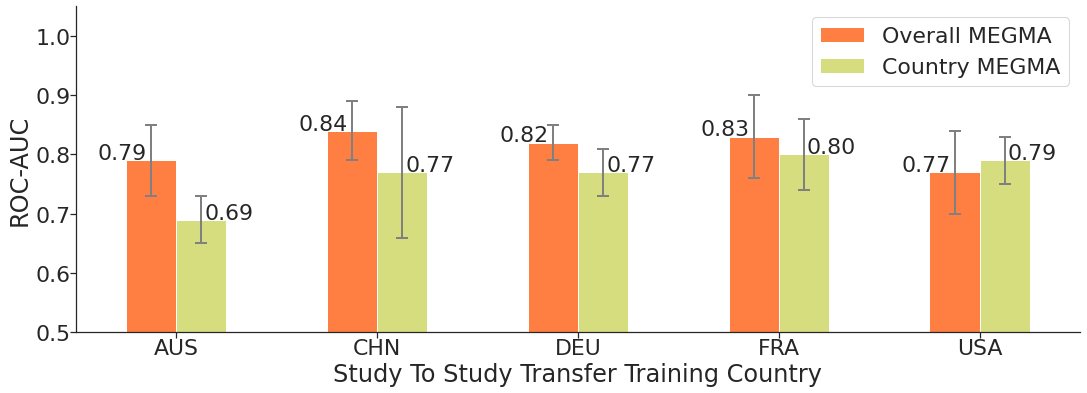

In [12]:
sns.set(style = 'white', font_scale=2)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18,6), sharex = True, sharey = True)

y1 = get_non_diag_mean(dfres1)[0].to_frame(name = 'Overall MEGMA')
y2 = get_non_diag_mean(dfres2)[0].to_frame(name = 'Country MEGMA')

y1_err = get_non_diag_mean(dfres1)[1].to_frame(name = 'Overall MEGMA')
y2_err = get_non_diag_mean(dfres2)[1].to_frame(name = 'Country MEGMA')

y = y1.join(y2)
y_err = y1_err.join(y2_err)

color = sns.color_palette("rainbow_r", 5) #PiYG

y.plot(kind = 'bar',ax = ax, color = color, yerr= y_err,ylim = (0.5, 0.96), error_kw=dict(ecolor='gray', lw=2, capsize=6, capthick=2))
ax.set_ylabel('ROC-AUC')
#ax.set_title('Study To Study Transfer (STST) Average Performance')
ax.set_xlabel('Study To Study Transfer Training Country')

for x_, y_ in enumerate(y['Overall MEGMA'].values):
    ax.annotate('%.2f' % y_, xy = (x_-0.39, y_+0.002), fontsize =22)

for  x_, y_ in enumerate(y['Country MEGMA'].values):
    ax.annotate('%.2f' % y_, xy = (x_+0.14, y_+0.002), fontsize =22)
    
ax.set_xticklabels(labels = y.index,rotation=0, ha = 'center')
ax.set_ylim(0.5,1.05)

ax.tick_params(bottom='on', left='off',  labelleft='on', labelbottom='on', pad=-.6,)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.savefig('./images/STST_megma_all_vs_megma_country.pdf', bbox_inches='tight', dpi=400) 

* For overall megma, we can see that the model trained on the `megma_all` generated **USA** Fmaps shows worst performance (STST average roc-auc: 0.77, i.e., the model performance on the rest countries).
* For country-specific megma, we can see that the model trained on the `megma_AUS` generated **AUS** Fmaps shows worst performance (STST average roc-auc: 0.69). This means that the `megma` fitted by **AUS** abundance data is not good enough. It is likely that the abundance data of AUS is relatively special, and the sample size is too small to present the global and intrinsic correlation between microorganisms, resulting in a biased arrangement of the 2D map.


In next section, we will explain the model trained on the Fmaps generated by overall `megma` and country-specific `megma`. We can identify the important microbes that contribute to the model prediction, and generate the saliency map using the global feature importance and the microbe 2D postions in `megma` object.

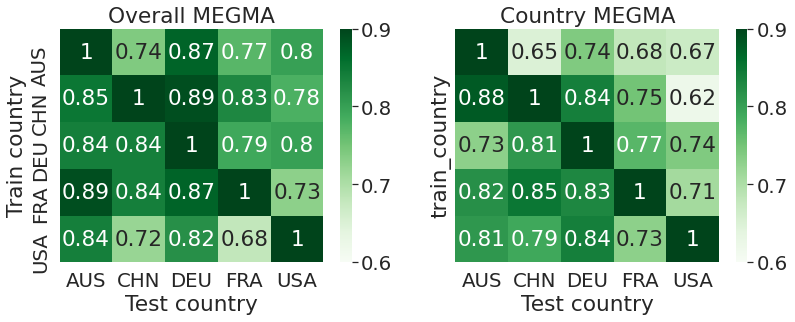

In [20]:
sns.set(style = 'white', font_scale=1.8)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4.3), sharex=True, sharey=True)

ax1, ax2 = axes

sns.heatmap(dfres1.round(2), cmap = 'Greens',  ax = ax1, annot=True,  vmin = 0.6, vmax = 0.9,)
ax1.set_title("Overall MEGMA")

sns.heatmap(dfres2.round(2), cmap = 'Greens',  ax = ax2, annot=True, vmin = 0.6, vmax = 0.9,)
ax2.set_title("Country MEGMA")

ax1.set_ylabel('Train country')
# ax2.set_ylabel('Train country')

ax1.set_xlabel('Test country')
ax2.set_xlabel('Test country')

fig.savefig('./images/STST_roc_megma_all_vs_megma_country.png', bbox_inches='tight', dpi=400)
fig.savefig('./images/STST_roc_megma_all_vs_megma_country.pdf', bbox_inches='tight', dpi=400)

In [19]:
dfres1.to_csv('./images/STST_ROC_megma_all.csv')
dfres2.to_csv('./images/STST_ROC_megma_specific.csv')

## 4. Important microbial marker identification

In this section, we are going to calculate the global feature importance (GFI) to find out the key microbes that contributes to the CRC detection model. The *simply-explainer* is used to calculate the GFI, more about the AggMapNet model exaplaination can be found [**here**](https://bidd-aggmap.readthedocs.io/en/latest/_HPs/hps_content.html#AggMapNet-Explainers). By calculating the importance score for each microbes, we can draw the saliency-map to find out the hot zone in the **2D-microbiomeprints**.

[**Saliency-Map**](https://www.geeksforgeeks.org/what-is-saliency-map/) is an image in which the brightness of a pixel represents how salient the pixel is i.e brightness of a pixel is directly proportional to its saliency. It is generally a grayscale image. Saliency maps are also called as a heat map where hotness refers to those regions of the image which have a big impact on predicting the class which the object belongs to. 

The purpose of the saliency-map is to find the regions which are prominent or noticeable at every location in the visual field and to guide the selection of attended locations, based on the spatial distribution of saliency. 





[4.1 Calculate the global feature importance](#4.1-Calculate-the-global-feature-importance)

* [4.1.1 GFI for model trained on overall MEGMA Fmaps](#4.1.1-GFI-for-model-trained-on-overall-MEGMA-Fmaps)

* [4.1.2 GFI for model trained on country specific MEGMA Fmaps](#4.1.2-GFI-for-model-trained-on-country-specific-MEGMA-Fmaps)

[4.2 Generate the explaination saliency map](#4.2-Generate-the-explaination-saliency-map) 

* [4.2.1 Saliency map for overall MEGMA Fmaps](#4.2.1-Saliency-map-for-overall-MEGMA-Fmaps)

* [4.2.2 Saliency map country specific MEGMA Fmaps](#4.2.2-Saliency-map-country-specific-MEGMA-Fmaps)

[4.3 Global feature importance correlation](#4.3-Global-feature-importance-correlation) 

[4.4 Discussions and conclusions on saliency map](#4.4-Discussions-and-conclusions-on-saliency-map) 

In [40]:
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import os
sns.set(style='white',  font='sans-serif', font_scale=2)


from aggmap import loadmap, AggMapNet
from aggmap.AggMapNet import load_model

### 4.1 Calculate the global feature importance

Let's calculate the GFI first. We need to reload the trained model that dumped in the disk. After that, we will use the `simply_explainer` to calculate GFI based on the training set data (i.e., the one country data used to train the model).

#### 4.1.1 GFI for model trained on overall MEGMA Fmaps

The global feature importance is calculated based on the training set. Once we got the GFI values, The megma object can help us to reshape the GFI vector to the saliency map. 


In [41]:
countries = ['AUS', 'CHN', 'DEU', 'FRA', 'USA'] 

model_dir = './megma_overall_model'
# load the pre-fitted megma_all object
megma = loadmap('./megma/megma.all')

gfis = []
for country in countries:
    clf = load_model(os.path.join(model_dir, 'aggmapnet.%s' % country),  gpuid=0)
    sxp = AggMapNet.simply_explainer(clf, megma, 
                                     backgroud = 'global_min', 
                                     apply_smoothing = True)
    gfi = sxp.global_explain()
    gfis.append(gfi.simply_importance_class_0.to_frame(name = country))
    
dfimp1 = pd.concat(gfis, axis=1)

2022-08-23 14:50:40,816 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:50:40,876 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:06<00:00, 144.03it/s]

2022-08-23 14:50:46,919 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:07<00:00, 115.34it/s]


2022-08-23 14:50:54,534 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:50:54,590 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:08<00:00, 101.50it/s]

2022-08-23 14:51:03,164 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:08<00:00, 102.50it/s]

2022-08-23 14:51:11,728 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set


2022-08-23 14:51:11,783 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 870/870 [00:07<00:00, 118.12it/s]

2022-08-23 14:51:19,151 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:07<00:00, 110.75it/s]

2022-08-23 14:51:27,072 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:51:27,126 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 870/870 [00:06<00:00, 131.94it/s]

2022-08-23 14:51:33,724 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:06<00:00, 125.66it/s]

2022-08-23 14:51:40,716 - INFO - [bidd-aggmap] - Explaining the whole samples of the training Set
2022-08-23 14:51:40,772 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 870/870 [00:06<00:00, 129.03it/s]

2022-08-23 14:51:47,517 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 870/870 [00:06<00:00, 132.44it/s]


#### 4.1.2 GFI for model trained on country specific MEGMA Fmaps


In [42]:
model_dir = './megma_country_model'

gfis2 = []
reshape_indexes = {}
for country in countries:
    #load the country-specific megma
    megma = loadmap('./megma/megma.%s' % country)
    clf = load_model(os.path.join(model_dir, 'aggmapnet.%s' % country),  gpuid=0)
    sxp = AggMapNet.simply_explainer(clf, megma, 
                                     backgroud = 'global_min', 
                                     apply_smoothing = True)
    gfi2 = sxp.global_explain(clf.X_, clf.y_)
    gfis2.append(gfi2.simply_importance_class_0.to_frame(name = country))
    
    ## megma is different, therefore the reshape index and fmap_shape is also different
    reshape_index = megma.feature_names_reshape
    reshape_indexes.update({country: (megma.fmap_shape, reshape_index)})
    
dfimp2 = pd.concat(gfis2, axis=1)

2022-08-23 14:51:54,224 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 756/756 [00:06<00:00, 124.74it/s]

2022-08-23 14:52:00,286 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:06<00:00, 116.17it/s]


2022-08-23 14:52:06,921 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 650/650 [00:05<00:00, 110.10it/s]

2022-08-23 14:52:12,828 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 650/650 [00:05<00:00, 108.49it/s]

2022-08-23 14:52:18,950 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|#################################################################################| 756/756 [00:08<00:00, 91.79it/s]

2022-08-23 14:52:27,189 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:06<00:00, 108.12it/s]


2022-08-23 14:52:34,320 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...


100%|################################################################################| 784/784 [00:06<00:00, 115.26it/s]

2022-08-23 14:52:41,124 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 784/784 [00:07<00:00, 108.63it/s]

2022-08-23 14:52:48,476 - INFO - [bidd-aggmap] - calculating feature importance for class 0 ...



100%|################################################################################| 756/756 [00:05<00:00, 132.63it/s]

2022-08-23 14:52:54,178 - INFO - [bidd-aggmap] - calculating feature importance for class 1 ...



100%|################################################################################| 756/756 [00:05<00:00, 136.45it/s]


### 4.2 Generate the explaination saliency map



#### 4.2.1 Saliency map for overall MEGMA Fmaps



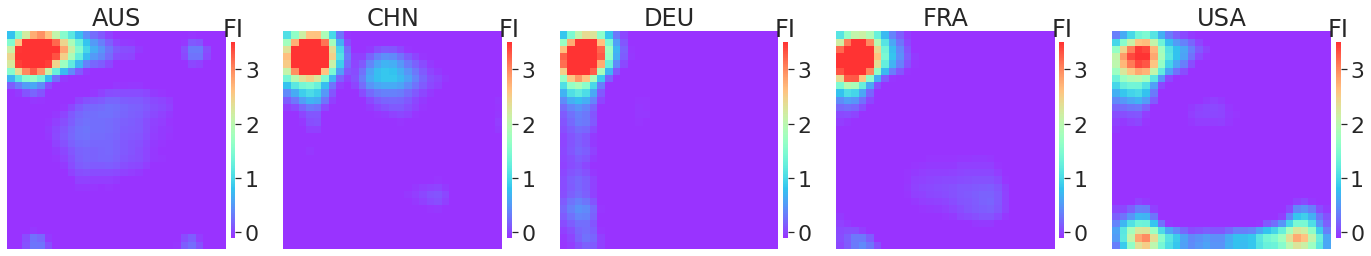

In [43]:
megma = loadmap('./megma/megma.all')

fig, axes  = plt.subplots(1, 5, figsize=(24, 4))

for country, ax in zip(countries, axes):
    
    IMPM = dfimp1[country].values.reshape(*megma.fmap_shape)
    #print(IMPM.max().round(1))

    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, ax =ax, xticklabels=0, yticklabels=0, 
                vmin = -0.1, vmax = 3.5, 
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

    plt.subplots_adjust(wspace = 0.18)

#### 4.2.2 Saliency map country specific MEGMA Fmaps

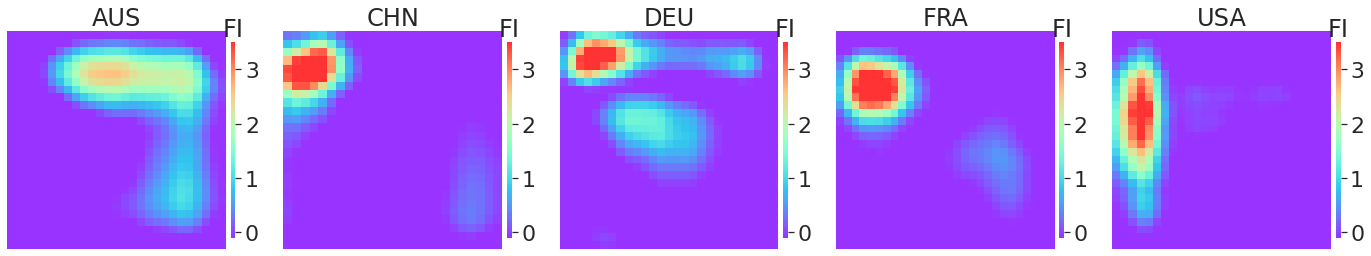

In [44]:
fig, axes  = plt.subplots(1, 5, figsize=(24, 4))

for country, ax in zip(countries, axes):

    fmap_shape, reshape_idx =  reshape_indexes[country]
    IMPM = dfimp2.loc[reshape_idx][country].values.reshape(*fmap_shape)
    #print(IMPM.max().round(1))

    sns.heatmap(IMPM,  
                cmap = 'rainbow', alpha = 0.8, ax =ax, xticklabels=0, yticklabels=0, 
                vmin = -0.1, vmax = 3.5,  
                cbar_kws = {'fraction':0.046, 'shrink':0.9, 'aspect': 40, 'pad':0.02, })

    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

    ax.set_title(country)
    cbar = ax.collections[0].colorbar
    cbar.ax.set_title('FI')
    cbar.ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))

    plt.subplots_adjust(wspace = 0.18)

----

### 4.3 Global feature importance correlation

lets calculate the correlations between the global feature importance (GFI) scores in different countries.


In [56]:

fig, axes = plt.subplots(ncols = 2, figsize=(14,5))

ax1, ax2 = axes

sns.heatmap(dfimp1.corr(), annot=True, fmt='.2f', linewidths=.3, ax = ax1,
                 annot_kws={"size": 16}, square=True,robust=True, vmin = 0, vmax = 0.9,
                 cmap='Greens')

sns.heatmap(dfimp2.corr(), annot=True, fmt='.2f', linewidths=.3, ax = ax2,
                 annot_kws={"size": 16}, square=True,robust=True, vmin = 0, vmax = 0.9,
                 cmap='Greens')

ax1.set_title("Overall MEGMA")
ax2.set_title("Country MEGMA")

plt.tight_layout()

fig.savefig('./images/GFI_megma_all_vs_megma_country.png', bbox_inches='tight', dpi=400) 
dfimp1.to_csv('./images/STST_GFI_megma_all.csv')
dfimp2.to_csv('./images/STST_GFI_megma_specific.csv')

Let's show the important microbes in the hot zones

In [57]:
dfimp1.mean(axis=1).sort_values(ascending=False).head(20)

Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]      5.218354
Parvimonas sp. [ref_mOTU_v2_4961]                            4.979554
unknown Dialister [meta_mOTU_v2_5867]                        4.836612
Alloprevotella tannerae [ref_mOTU_v2_4636]                   4.834034
Peptostreptococcus anaerobius [ref_mOTU_v2_0148]             4.693618
Prevotella oris [ref_mOTU_v2_0520]                           4.692594
Anaerococcus obesiensis/vaginalis [ref_mOTU_v2_0429]         4.499776
Parvimonas sp. [ref_mOTU_v2_5245]                            4.463052
Pyramidobacter piscolens [ref_mOTU_v2_4064]                  4.232398
Parvimonas micra [ref_mOTU_v2_1145]                          4.171736
Streptococcus constellatus/intermedius [ref_mOTU_v2_0143]    3.993972
Fusobacterium nucleatum s. animalis [ref_mOTU_v2_0776]       3.772395
Streptococcus anginosus [ref_mOTU_v2_0004]                   3.696676
Streptococcus anginosus [ref_mOTU_v2_0351]                   3.673769
Porphyromonas somera

In [58]:
S1 = dfimp2.AUS.sort_values(ascending=False).head(20).index.to_list()
S2 = dfimp2.CHN.sort_values(ascending=False).head(20).index.to_list()
S3 = dfimp2.DEU.sort_values(ascending=False).head(20).index.to_list()
S4 = dfimp2.FRA.sort_values(ascending=False).head(20).index.to_list()
S5 = dfimp2.USA.sort_values(ascending=False).head(20).index.to_list()

In [59]:
set(S2) & set(S3) & set(S4)

{'Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]',
 'Parvimonas micra [ref_mOTU_v2_1145]',
 'unknown Dialister [meta_mOTU_v2_5867]'}

### 4.4 Discussions and conclusions on saliency map

We can see that there are some notable regions on the saliency map, i.e., the hot zones. The microbes in these zones are important microbes. For the 5 detection models built from `megma_all` transformed Fmaps, all of the important zones is in the left upper conner (as shown in **Fig.1**), and their GFI scores are highly-correlated to each other.

![overall](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/overall.png)
**Fig. 1**: Fmaps generated by overall `megma` and the saliency maps.



----


For the 5 detection models built from country-specific `megma` transformed Fmaps, the important zones located in different areas(as shown in **Fig.2**), but the GFI values are highly-correlated among the four countries of CHN, FRA, DEU, and USA.

![specific](https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/images/specific.png)
**Fig. 2**: Fmaps generated by country-specific `megma` and the saliency maps.

By fitting megma with different data, the 2D arrangement of microorganisms is different. Therefore, the hot zones for the country-specific megma is in different regions. Although the hot regions are different, the microbes in these regions may be in high consistant (for examples, the species of *Fusobacterium nucleatum s. vincentii [ref_mOTU_v2_0754]*, *Parvimonas sp. [ref_mOTU_v2_4961]*, and *unknown Dialister [meta_mOTU_v2_5867]* are located in these zones.). 

We can see that the performance of the models trained based on these Fmaps is also different. The performance of the model is increased if the key microbes are clustered together, so that the hotspots can also be seen in the saliency map. For example, the STST performance for the country-specific `megma_AUS` is worst among the 5 countries, and the hot zone and GFI calculated also shows not so consistant with the rest countries.

In conclusion, the overall `megma` (fitted by all metagenomic abundance data) shows better performance than country-specific `megma` (fitted by one country metagenomic abundance data), suggesting that unsupervised `megma` should also be fitted on larger samples. The MEGMA-AggMapNet-Explainer pipeline can be used to identify important microbes.

## 5. Toplogical analyisis on the important microbes


In `MEGMA`, the micribes are embedded into 2D based on their correlation distance using the UMAP-mediated manifold learning approach. In this section, let's explore the toplogical relationship between the microbes. We can first fetch the optimized topological weighted graph in 2D based on their correlations, then we can show how the linear assignment algrithm to assign the microbes into the reglar grid to form the feature maps.

[5.1 Plotting the the embedded and arranged microbes](#5.1-Plotting-the-the-embedded-and-arranged-microbes)

[5.2 Plotting the linear assignment of the embedded microbes](#5.2-Plotting-the-linear-assignment-of-the-embedded-microbes)

[5.3 Fetching the optimized toplogical graph and clustering](#5.3-Fetching-the-optimized-toplogical-graph-and-clustering)

[5.4 Exploring the toplogical relationship of the important microbes](#5.4-Exploring-the-toplogical-relationship-of-the-important-microbes)

### 5.1 Plotting the the embedded and arranged microbes

We can plot the embedded microbes using the `plot_scatter` method, the 2D-arrangments can be visulized by the `plot_grid` method.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist, squareform
from scipy.stats import entropy, truncnorm
import networkx as nx
import markov_clustering as mc

from aggmap import loadmap

sns.set(style='white',  font='sans-serif', font_scale=1.5)

In [2]:
megma_all = loadmap('./megma/megma.all')
megma_all.df_scatter.y = -megma_all.df_scatter.y
megma_all.df_embedding.y = -megma_all.df_embedding.y

In [3]:
megma_all.plot_scatter(htmlpath='./images', radius=5, enabled_data_labels=False)

2022-08-24 14:55:28,717 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 14:55:28,725 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


In [4]:
megma_all.plot_grid(htmlpath='./images')

2022-08-24 14:55:28,734 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_mp
2022-08-24 14:55:28,784 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_mp


Since megma rearranges the microbes into 2D based on their abundance correlations, we can show the mean abundance of these microbes in the embedded 2D space and 2D-grid. We can see the local smoothing on the mean abundance of the microbes. 

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16, 6))

p = megma_all.df_scatter.set_index('IDs').join(megma_all.info_scale['mean'])
ax1.scatter(p.x, p.y, c = p['mean'], cmap = 'jet')

df = pd.DataFrame(index=megma_all.feature_names_reshape)
tm = df.join(megma_all.info_scale['mean']).values.reshape(*megma_all.fmap_shape)
sns.heatmap(tm, cmap = 'jet', ax = ax2, linewidths = 0.5)

ax1.set_title('Microbial 2D-embedding plot')
ax1.set_xlabel('UMAP1')
ax1.set_ylabel('UMAP2')

ax2.set_title('Microbial 2D-grid plot')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

Text(599.4818181818181, 0.5, 'Y')


### 5.2 Plotting the linear assignment of the embedded microbes

Let us show how embedded microbes can be assigned to a 2D grid. After assignment, each grid point is a pixel, i.e., the microbial abundance feature point.


In [6]:
def plot_assignment(df_embedding, figsize = (10, 9)):
    
    df_sub2 = df_embedding.copy()
    grid = megma_all.df_grid_reshape.set_index('v')[['x', 'y']]
    grid.columns=['g_x', 'g_y']
    dfs = df_sub2.join(grid)

    w = dfs.g_x.max() + 1
    h = dfs.g_y.max() + 1

    my_grid = np.dstack(np.meshgrid(np.linspace(dfs.min().x, dfs.max().x, w), np.linspace(dfs.max().y, dfs.min().y, h))).reshape(-1,2)
    my_grid_index = np.dstack(np.meshgrid(np.linspace(0, w-1, w), np.linspace(0, h-1, h))).reshape(-1,2)

    dfg = pd.DataFrame(my_grid, columns=['t_x', 't_y'], )
    dfi = pd.DataFrame(my_grid_index.astype(int), columns=['g_x', 'g_y'])

    dfn = dfg.join(dfi).set_index(['g_x', 'g_y'])

    dfs = dfs.sort_values(['g_y', 'g_x']).set_index(['g_x','g_y'])
    dfs = dfs.join(dfn)

    fig, ax = plt.subplots(figsize = figsize)

    for i in range(len(dfs)):
        ts = dfs.iloc[i]
        ax.arrow(ts.x, ts.y, ts.t_x-ts.x, ts.t_y-ts.y, 
                 color = ts.colors, head_width = 0.08,  head_length=0.1, overhang = 0.5, lw=1)

    # nx.draw_networkx(g, pos=sub_pos, node_size = 200, labels=labeldict, with_labels = False, edgecolors = 'grey',
    #                  edge_color = 'gray', alpha = 1, width = 0.09, node_color= subgraph_colors)
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    ax.spines.left.set_visible(False)
    ax.spines.bottom.set_visible(False)
    fig.tight_layout()
    return fig

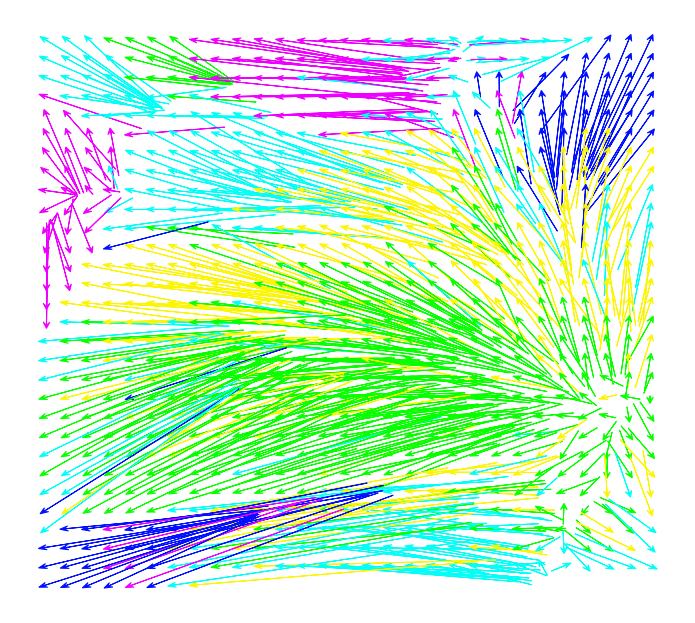

In [7]:
fig = plot_assignment(megma_all.df_embedding)

### 5.3 Fetching the optimized toplogical graph and clustering

Based on the global feature importance (GFI) and the saliency map analysis in previous section, we know that the important microbes in `megma_all` are located in the left upper corner. Therefore, we can obtain the microbes in this area by clustering the topological weighted graph of the 2D-embedding (the area highlighted with red-box). Let's fetch the low-dimensional topological graph first.

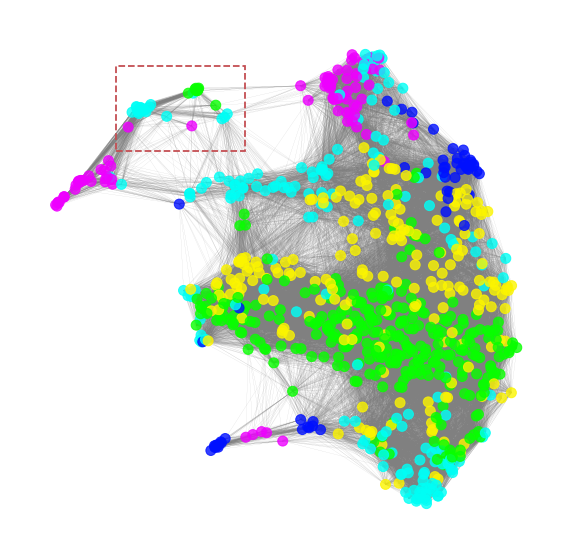

In [8]:
def get_graph_v(embd):
    '''
    Get the low dimensional graph
    '''
    distances = cdist(embd.embedding_, embd.embedding_)
    a = embd._a
    b = embd._b
    ## acorrding to UMAP defined low-D graph 
    graph_v = 1.0 / (1.0 + a * distances ** (2 * b))       
    return graph_v


gv = get_graph_v(megma_all.embedded)
#np.fill_diagonal(gv,0)
A = gv*(gv > 0.2)
np.fill_diagonal(A, 0.)
G = nx.from_numpy_matrix(np.matrix(A))

# layout = nx.spring_layout(G, iterations = 900)

dfs = megma_all.df_embedding

positions = dfs.reset_index()[['x', 'y']]
pos = {}
for i in range(len(positions)):
    pos.update({i:positions.iloc[i].values})
    
fig, ax = plt.subplots(figsize = (10, 10))
nx.draw(G, pos=pos, ax = ax, node_size = 100, edge_color = 'gray', #edgecolors = 'grey', 
        alpha = 0.8, width = 0.09, node_color= dfs.colors)
#nx.draw_networkx_edge_labels(G, pos=layout)
rect = patches.Rectangle((-3.5, 5), 2, 1.6, linewidth=1.8, ls = '--', edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

We can then use the [Markov clustering](http://micans.org/mcl/) to cluster the graph into several subgraphs, and pick up the cluster of the important microbes. In this cluster, the important cluster is 7 (i.e., the yellow color cluster)

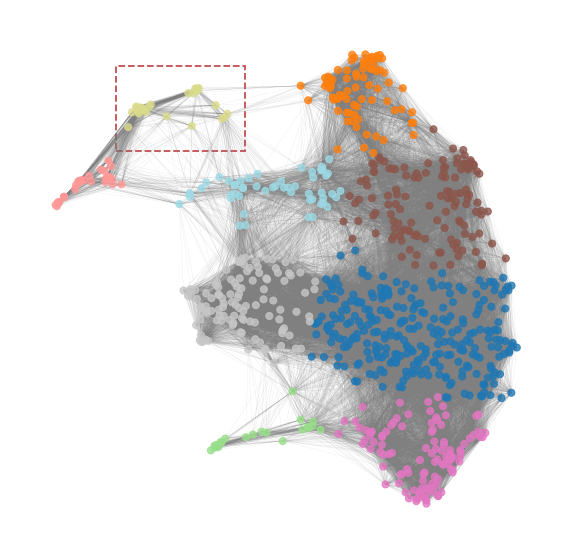

In [9]:
matrix = nx.to_scipy_sparse_matrix(G)
result = mc.run_mcl(matrix)           # run MCL with default parameters
clusters = mc.get_clusters(result)    # get clusters
cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
colors = [cluster_map[i] for i in range(len(G.nodes()))]

fig, ax = plt.subplots(figsize = (10, 10))

rect = patches.Rectangle((-3.5, 5), 2, 1.6, linewidth=1.8, ls = '--', edgecolor='r', facecolor='none')
# Add the patch to the Axes
ax.add_patch(rect)

nx.draw(G, pos=pos, ax = ax, node_size = 50, edge_color = 'gray', 
        alpha = 0.8, width = 0.07, node_color= colors, cmap = 'tab20')


### 5.4 Exploring the toplogical relationship of the important microbes

The important cluster will be picked and drawn in the figure below. We can see that the selected important cluster contains 35 important microbes, 11 microbes are in green color (cluster_02 of the hierarchical clustering based on the abundance distance), 22 are in blue color (cluster_03), and 2 are in purple color(cluster_05). We can see that these microbes are highly-correlated in each other on their abundances.

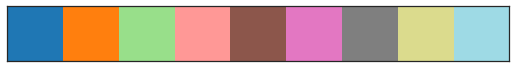

In [10]:
import cmasher as cmr
l = pd.Series(colors).value_counts().sort_index()
colors_ = cmr.take_cmap_colors('tab20', len(l), return_fmt='hex')
sns.palplot(colors_)

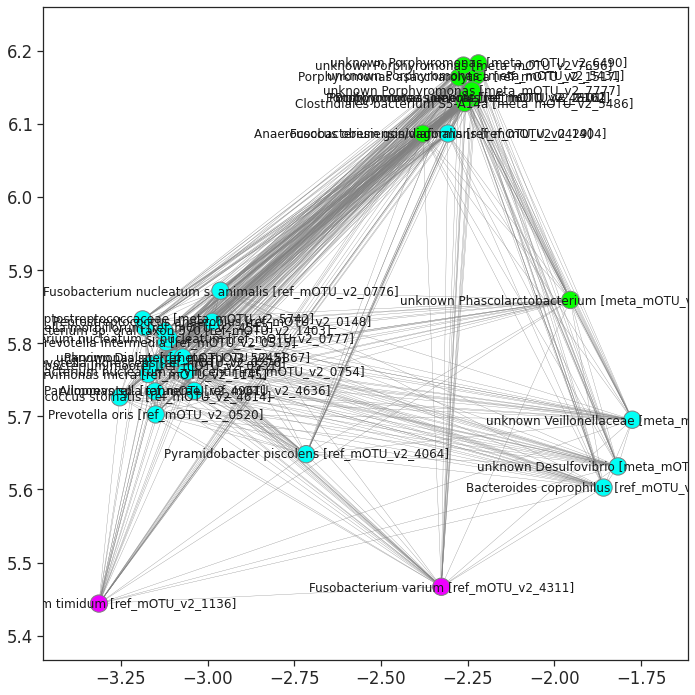

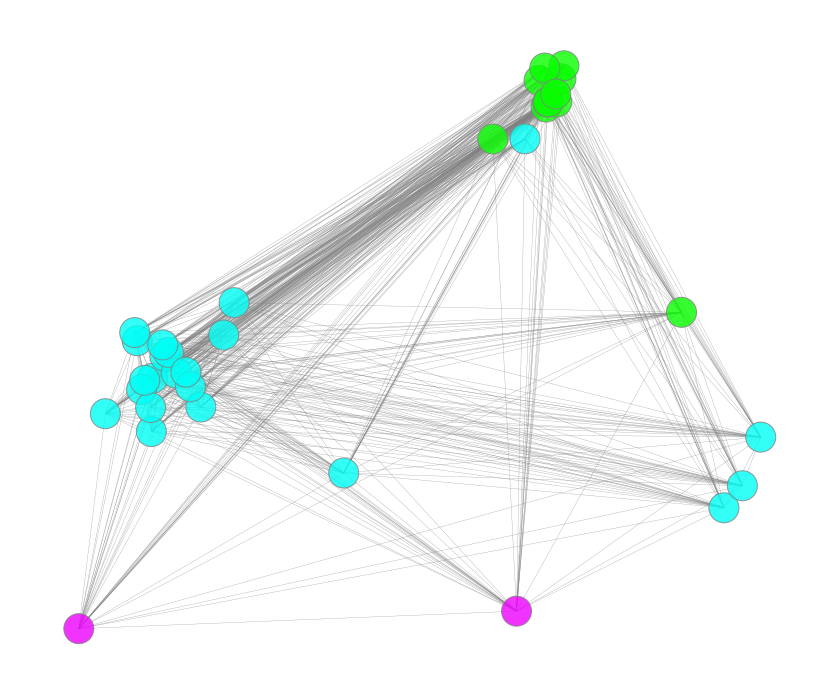

In [11]:
i = 7 ## selected cluster

important_nodes = pd.Series(colors)[pd.Series(colors)==i].index.to_list()
df_sub = dfs[(pd.Series(colors)== i).values]
sub_positions = positions[(pd.Series(colors)==i).values]
sub_pos = {}
for i in range(len(sub_positions)):
    ts = sub_positions.iloc[i]
    sub_pos.update({ts.name:ts.values})
    

g = G.subgraph(important_nodes)
subgraph_colors = df_sub.set_index('idx').loc[list(g.nodes)].colors


#df_sub.index = df_sub.index.map(lambda x:x.split(' [')[0])
# df_sub = df_sub[~df_sub.index.duplicated(keep='first')]
labeldict = df_sub.reset_index().set_index('idx')['index'].to_dict()


fig, ax = plt.subplots(figsize = (10, 10))
nx.draw_networkx(g, pos=sub_pos, node_size = 300, labels=labeldict, with_labels = True, edgecolors = 'grey',
                 edge_color = 'gray', alpha = 1, width = 0.3, node_color= subgraph_colors)
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
fig.tight_layout()
fig.savefig('./images/label_35_graph.pdf', dpi=400) 

fig, ax = plt.subplots(figsize = (12, 10))
nx.draw_networkx(g, pos=sub_pos, node_size = 900, labels=labeldict, with_labels = False, edgecolors = 'grey',
                 edge_color = 'gray', alpha = 0.8, width = 0.3, node_color= subgraph_colors)

ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
fig.tight_layout()
fig.savefig('./images/unlabel_35_graph.pdf', dpi=400) 

In [12]:
from scipy.spatial.distance import squareform
import scipy.cluster.hierarchy as hc

dist = pd.DataFrame(squareform(megma_all.info_distance), 
                    columns=megma_all.flist, index = megma_all.flist)

l2 = df_sub[df_sub.Channels == 'cluster_02']
dist_matrix = dist.loc[l2.index][l2.index]
linkage = hc.linkage(squareform(dist_matrix), method='average', optimal_ordering =False)

sns.clustermap(1-dist_matrix,  cmap='RdYlGn', annot=True, 
               row_linkage=linkage, col_linkage=linkage,
               annot_kws={"size": 8}, vmin=-1, vmax=1, figsize=(13,12))

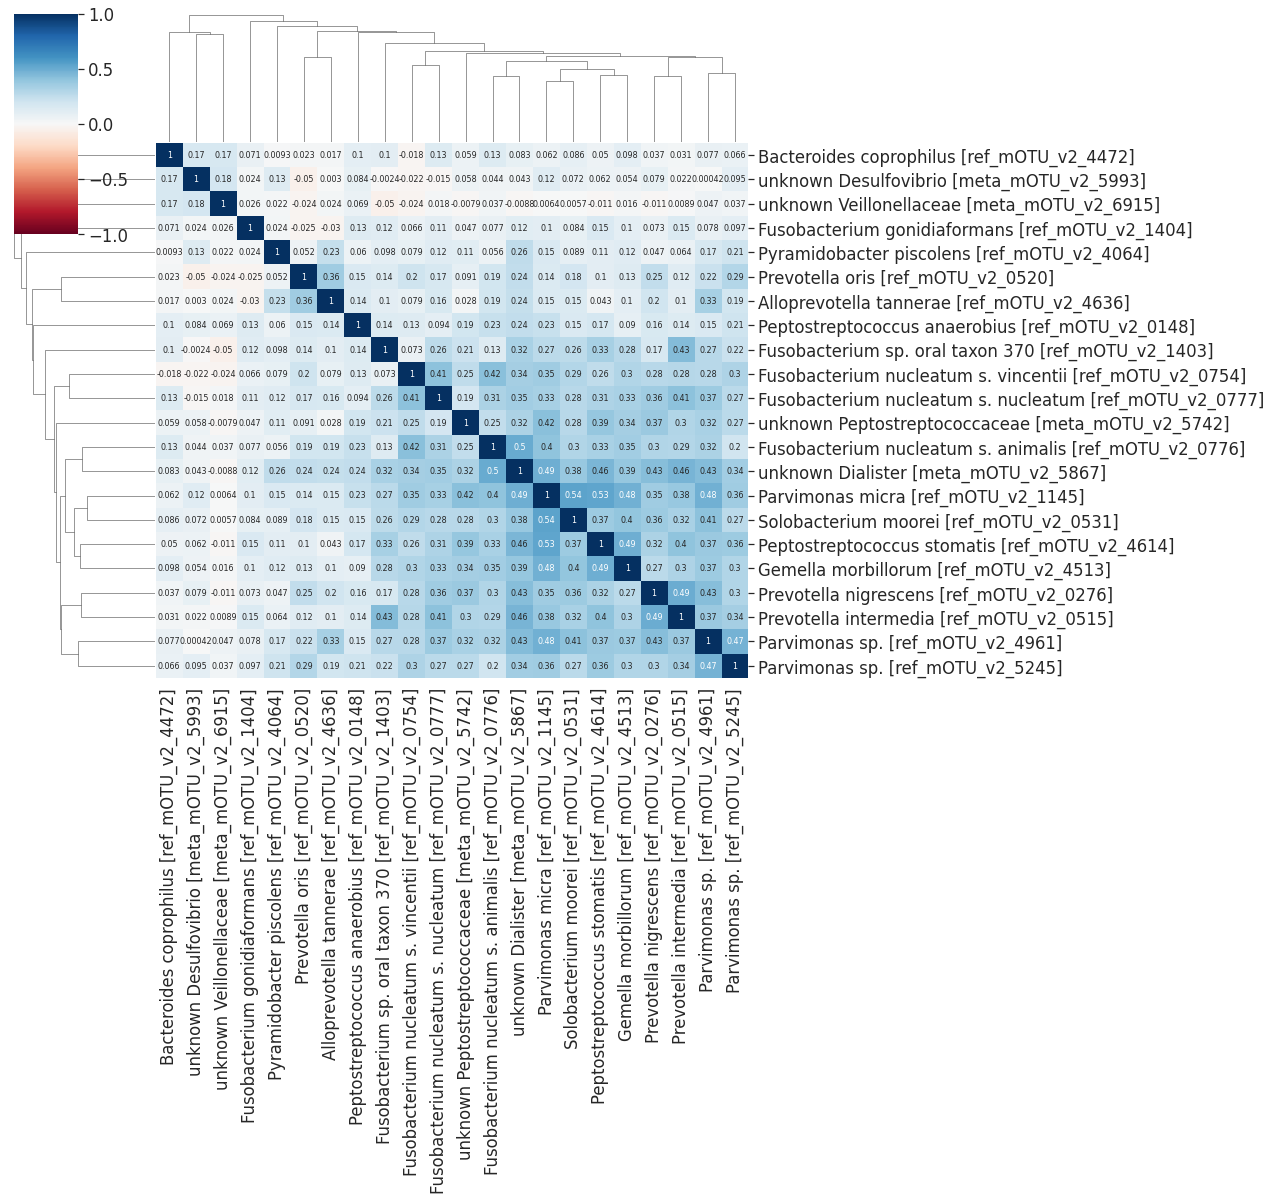

In [13]:
l2 = df_sub[df_sub.Channels == 'cluster_03']
dist_matrix = dist.loc[l2.index][l2.index]
linkage = hc.linkage(squareform(dist_matrix), method='average', optimal_ordering =False)

sns.clustermap(1-dist_matrix,  cmap='RdBu', annot=True, 
               row_linkage=linkage, col_linkage=linkage,
               annot_kws={"size": 8}, vmin=-1, vmax=1, figsize=(18,17))

## 6. Exploring the embedding & grouping in MEGMA

For the **Embedding**, we can use various manifold learning algorithms or random method to embed microbes in 2D; For the **Grouping**, we can use various clustering methods to group microbes or use the pre-defined group information to group the microbes. Now, let's try different methods to perform the embedding and grouping operations in `MEGMA`.


[6.1 Microbial embedding](#6.1-Microbial-embedding)
* [6.1.1 Manifold embedding](#6.1.1-Manifold-embedding)
* [6.1.2 Ramdom embedding](#6.1.2-Ramdom-embedding)

[6.2 Microbial grouping](#6.2-Microbial-grouping)
* [6.2.1 Hierarchical clustering tree based grouping](#6.2.1-Hierarchical-clustering-tree-based-grouping)
* [6.2.2 Taxonomic tree based grouping](#6.2.2-Taxonomic-tree-based-grouping)

### 6.1 Microbial embedding

In this section, we can change the embedding method on the loaded `megma` object. The `megma` object supports a refit operation to update itself, so you don't need to reinitialize a new `megma`.

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
import numpy as np
import aggmap
from aggmap import loadmap, AggMap

megma = loadmap('./megma/megma.all')

#### 6.1.1 Manifold embedding

Let's try several manifold methods to embed the microbes in megma.

In [24]:
manifold_methods = ['mds', 'isomap', 'umap', 'tsne', 'lle', 'se']

In [25]:
# using mds
megma_new = megma.copy()
megma_new.fit(emb_method = 'mds',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:23,232 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:28,732 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:29,802 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:29,808 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_mds_scatter
2022-08-24 15:36:29,814 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_mds_scatter


In [26]:
# using isomap
megma_new = megma.copy()
megma_new.fit(emb_method = 'isomap',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:29,828 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:30,074 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:30,980 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:30,986 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_isomap_scatter
2022-08-24 15:36:30,992 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_isomap_scatter


In [27]:
# using tsne
megma_new = megma.copy()
megma_new.fit(emb_method = 'tsne',  verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:36:31,006 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:36:31,665 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:36:32,025 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:36:32,033 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_tsne_scatter
2022-08-24 15:36:32,041 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_tsne_scatter


#### 6.1.2 Ramdom embedding

Random embedding method just randomly assigns the 2D-coordinates to the microbes:

In [29]:
# using tsne
megma_new = megma.copy()
megma_new.fit(emb_method = 'random', random_state=123, verbose=0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 15:38:42,385 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 15:38:42,406 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 15:38:43,505 - INFO - [bidd-aggmap] - Finished
2022-08-24 15:38:43,511 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_random_scatter
2022-08-24 15:38:43,518 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_random_scatter


### 6.2 Microbial grouping

The microbes can be grouped into several groups based on their **phenotype** or **genotype** distances. 

* For the phenotype-based grouping (or metagenomic grouping), we can calculate the microbial metagenomic abundance correlation distances and then use the agglomerative hierarchical clustering to group the microbes. The default MEGMA uses this method to group the microbes (The cluster number c = 5)，the number of clusters can be specified by users. 

* For the genotype-based grouping, we can build a phylogenetic tree and then we can group the microbes by truncating taxonomic levels in the phylogenetic tree, such as by truncating the Kingdom or Phylum level we can generate the different cluster numbers.

The cluster number c is the number of the channels in the feature map, e. g., c=10 means that the number of channels of the 2D-microbiomeprint is 10. 


#### 6.2.1 Hierarchical clustering tree based grouping


2022-08-24 16:07:38,374 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 16:07:38,997 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 16:07:40,003 - INFO - [bidd-aggmap] - Finished


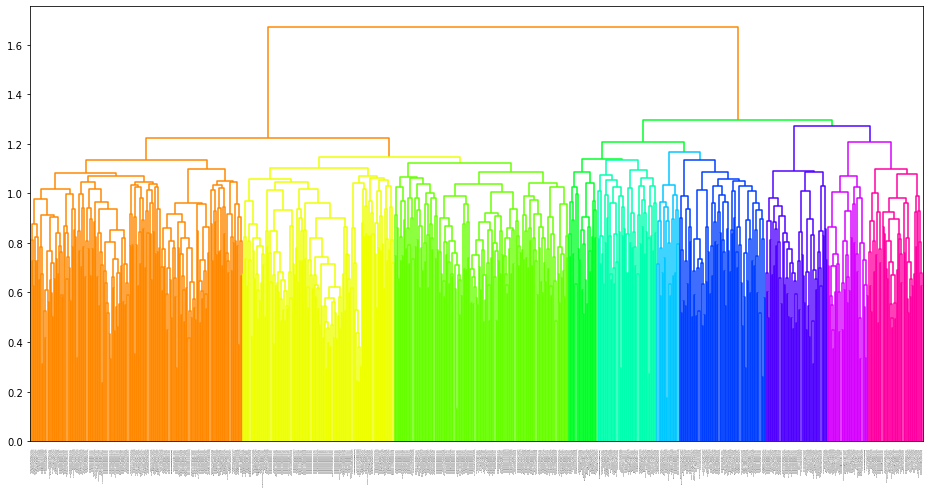

In [41]:
# c = 10
megma_new = megma.copy()
megma_new.fit(cluster_channels = 10, verbose = 0)
fig = megma_new.plot_tree(leaf_font_size=0)

In [42]:
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 16:07:50,211 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 16:07:50,220 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


2022-08-24 16:07:50,239 - INFO - [bidd-aggmap] - applying hierarchical clustering to obtain group information ...
2022-08-24 16:07:50,862 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 16:07:51,868 - INFO - [bidd-aggmap] - Finished


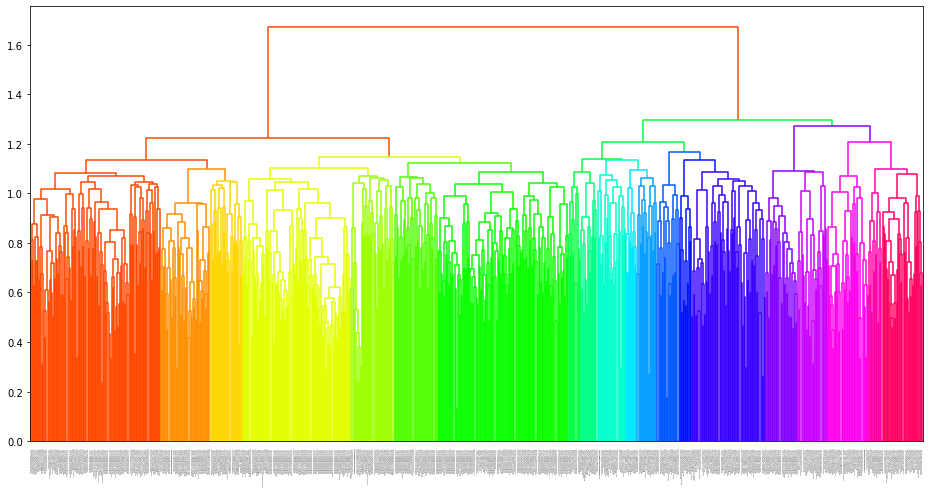

In [43]:
# c = 20
megma_new = megma.copy()
megma_new.fit(cluster_channels = 20, verbose = 0)
fig = megma_new.plot_tree(leaf_font_size=0)

In [44]:
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 16:08:01,983 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 16:08:01,994 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


#### 6.2.2 Taxonomic tree based grouping

Now, let's try to group the microbes by taxonomic level. The microbes we used has no taxonomic profiles, therefore, we first need to map the taxonomic profile to each microbes based on the mOTU ID.

The parameter `feature_group_list` supports a customized grouping information to group the microbes, we can generate the feature group list based on the taxonomic level of kingdom, phylum, class, order, and so on.

In [78]:
## get the taxonomic profiles of all mOTUs 
url = 'https://raw.githubusercontent.com/shenwanxiang/bidd-aggmap/master/docs/source/_example_MEGMA/dataset/'
dfm = pd.read_csv(url + 'mOTUs_new_taxonomic_profile.txt',sep='\t')
dfm = dfm.set_index('#mOTU')[['consensus_taxonomy']]
dfm.head(5)

consensus_taxonomy
#mOTU                                                              
ref_mOTU_v2_0001  k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...
ref_mOTU_v2_0002  k__Bacteria|p__Proteobacteria|c__Betaproteobac...
ref_mOTU_v2_0003  k__Bacteria|p__Firmicutes|c__Negativicutes|o__...
ref_mOTU_v2_0004  k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...
ref_mOTU_v2_0005  k__Bacteria|p__Firmicutes|c__Bacilli|o__Lactob...

In [101]:
## get the mOTU id for our microbes in megma
dfs = pd.DataFrame(megma.alist, columns = ['IDs'])
dfs['mOTU'] = dfs.IDs.apply(lambda x:x.split('[')[1]).apply(lambda x:x.split(']')[0])
dfs = dfs.set_index('mOTU')
dfs.head(5)

IDs
mOTU                                                               
ref_mOTU_v2_0473       Clostridium saccharogumia [ref_mOTU_v2_0473]
ref_mOTU_v2_0643            Clostridium innocuum [ref_mOTU_v2_0643]
ref_mOTU_v2_0860        Clostridium sp. KLE 1755 [ref_mOTU_v2_0860]
ref_mOTU_v2_0883            Clostridium scindens [ref_mOTU_v2_0883]
ref_mOTU_v2_0886  Clostridium boltae/clostridioforme [ref_mOTU_v...

In [102]:
#join the taxonomic profile
dfs = dfs.join(dfm)
dfs.head(5)

IDs  \
mOTU                                                                  
ref_mOTU_v2_0473       Clostridium saccharogumia [ref_mOTU_v2_0473]   
ref_mOTU_v2_0643            Clostridium innocuum [ref_mOTU_v2_0643]   
ref_mOTU_v2_0860        Clostridium sp. KLE 1755 [ref_mOTU_v2_0860]   
ref_mOTU_v2_0883            Clostridium scindens [ref_mOTU_v2_0883]   
ref_mOTU_v2_0886  Clostridium boltae/clostridioforme [ref_mOTU_v...   

                                                 consensus_taxonomy  
mOTU                                                                 
ref_mOTU_v2_0473  k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...  
ref_mOTU_v2_0643  k__Bacteria|p__Firmicutes|c__Erysipelotrichia|...  
ref_mOTU_v2_0860  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  
ref_mOTU_v2_0883  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...  
ref_mOTU_v2_0886  k__Bacteria|p__Firmicutes|c__Clostridia|o__Clo...

In [103]:
#the taxonomic level for each microbe
dft = dfs['consensus_taxonomy'].apply(lambda x: dict([i.split('__') for i in x.split('|')])).apply(pd.Series)
level_dict = {'k':'kingdom', 'p':'phylum', 'c':'class' ,'o':'order' ,'f':'family' ,'g': 'genus','s': 'species'}
dft = dft.rename(columns=level_dict)
dft.head(5)

kingdom      phylum             class               order  \
mOTU                                                                           
ref_mOTU_v2_0473  Bacteria  Firmicutes  Erysipelotrichia  Erysipelotrichales   
ref_mOTU_v2_0643  Bacteria  Firmicutes  Erysipelotrichia  Erysipelotrichales   
ref_mOTU_v2_0860  Bacteria  Firmicutes        Clostridia       Clostridiales   
ref_mOTU_v2_0883  Bacteria  Firmicutes        Clostridia       Clostridiales   
ref_mOTU_v2_0886  Bacteria  Firmicutes        Clostridia       Clostridiales   

                               family                   genus  \
mOTU                                                            
ref_mOTU_v2_0473  Erysipelotrichaceae  Erysipelatoclostridium   
ref_mOTU_v2_0643  Erysipelotrichaceae  Erysipelatoclostridium   
ref_mOTU_v2_0860       Clostridiaceae             Clostridium   
ref_mOTU_v2_0883      Lachnospiraceae       Lachnoclostridium   
ref_mOTU_v2_0886      Lachnospiraceae       Lachnoclostridium   

                                                            species  
mOTU                                                                 
ref_mOTU_v2_0473                        [Clostridium] saccharogumia  
ref_mOTU_v2_0643  [Clostridium] innocuum [C Clostridioides diffi...  
ref_mOTU_v2_0860                           Clostridium sp. KLE 1755  
ref_mOTU_v2_0883                             [Clostridium] scindens  
ref_mOTU_v2_0886       [Clostridium] sp. [C boltae/clostridioforme]

In [120]:
# grouping by kingdom level
feature_group_list = dft['kingdom'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 18:11:18,456 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 18:11:19,461 - INFO - [bidd-aggmap] - Finished
2022-08-24 18:11:19,467 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 18:11:19,472 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


In [107]:
# grouping by phylum level
feature_group_list = dft['phylum'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 17:39:35,833 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 17:39:36,838 - INFO - [bidd-aggmap] - Finished
2022-08-24 17:39:36,844 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 17:39:36,853 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter


In [106]:
# grouping by class level
feature_group_list = dft['class'].tolist()
megma_new = megma.copy()
megma_new.fit(feature_group_list = feature_group_list, verbose = 0)
megma_new.plot_scatter(htmlpath='./images', radius = 5)

2022-08-24 17:39:05,503 - INFO - [bidd-aggmap] - Applying grid assignment of feature points, this may take several minutes(1~30 min)
2022-08-24 17:39:06,512 - INFO - [bidd-aggmap] - Finished
2022-08-24 17:39:06,518 - INFO - [bidd-aggmap] - generate file: ./images/feature points_849_correlation_umap_scatter
2022-08-24 17:39:06,530 - INFO - [bidd-aggmap] - save html file to ./images/feature points_849_correlation_umap_scatter
